In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio  
import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff  
from plotly.subplots import make_subplots  
from plotly.validators.scatter.marker import SymbolValidator

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('../../29CM_PJT_data/real_jjin.csv')

In [4]:
bdf = pd.read_csv('../../29CM_PJT_data/not_slave.csv')
bdf

Unnamed: 0                   user_no  birth_date gender
0            24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F
1            24424  ++QhQ1e1epIwx3vRl2Jo3g==  1994-08-20      F
2            24425  ++hK92KjjWxhaH5fVgRFww==  1997-03-30      F
3            24426  ++lFDeBZeRcsCbBxeojrRg==  1986-05-21      M
4            24427  ++sZDy2deoNeeFPySWPjWw==  8888-01-13      F
...            ...                       ...         ...    ...
230530      254953  zysBufGJ/L/+aCHRMY5/jw==         NaN    NaN
230531      254954  zzJh2DNSlyzZYCx1T7Yprw==  1984-02-01      F
230532      254955  zzblhcY6j0rWP7m/5w6kqg==  2002-02-26      F
230533      254956  zzzTNW8escss3zrnpuGMhQ==  1991-10-27      M
230534      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M

[230535 rows x 4 columns]

In [5]:
l = ['user_no',	'event_timestamp', 'event_name', 'item_no',	'device_type', 'mobile_brand_name', 'country', 'region', 'item_name', 'image_name', 'price', 'category1_name', 'category2_name', 'category3_name', 'brand_name', 'birth_date', 'gender']

In [6]:
event_df = pd.read_csv('../../29CM_PJT_data/sampled_events.csv')
product_df = pd.read_csv('../../29CM_PJT_data/sampled_products.csv')

In [7]:
bdf = pd.merge(bdf, event_df, how='left', on='user_no')
bdf

Unnamed: 0                   user_no  birth_date gender  \
0             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
1             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
2             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
3             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
4             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
...             ...                       ...         ...    ...   
3348821      254956  zzzTNW8escss3zrnpuGMhQ==  1991-10-27      M   
3348822      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348823      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348824      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348825      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   

                               session_id             event_timestamp  \
0        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 12:54:43.707039   
1        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 12:56:26.016064   
2        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:01:52.814017   
3        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:03:32.363041   
4        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:03:34.958052   
...                                   ...                         ...   
3348821  1a5794d7d2b6ab6321ee060c679a6ab6  2021-07-07 22:21:50.090009   
3348822  ba26b3c58cb9a591d68ad8fb78b468f7  2021-06-15 17:04:26.205004   
3348823  ba26b3c58cb9a591d68ad8fb78b468f7  2021-06-15 17:04:26.206005   
3348824  384b39b543032d5211fc47821c26a837  2021-07-02 23:13:04.460014   
3348825  23b97dc3b2fc80c1924d28c53164351a  2021-07-04 00:25:00.662004   

               event_name                   item_no device_type  \
0              click_item  xDOaovsve0DAADszuHC2eA==      mobile   
1              click_item  GuVWTZN/hb7j1eJ6D8XwtQ==      mobile   
2              click_item  +vHtBckbhztW25OyXAvdzg==      mobile   
3              click_item  xDQlyuOI5ibVqCOjNL/15g==      mobile   
4              click_item  xDQlyuOI5ibVqCOjNL/15g==      mobile   
...                   ...                       ...         ...   
3348821       add_to_cart  r5Uca6TzZUUNzZymBiWDHg==      mobile   
3348822  purchase_success  b9M/fPRnkCuV9cSaw0cp3w==      mobile   
3348823  purchase_success  9ltNUyvoS0mvECvQtrGBVw==      mobile   
3348824        click_item  OYUAwkyv8cGVUHcLQIBdmw==      mobile   
3348825  purchase_success  qnG9YZ0unGLOvlBe5KpbEQ==      mobile   

        mobile_brand_name mobile_model_name mobile_marketing_name  \
0                   Apple            iPhone                   NaN   
1                   Apple            iPhone                   NaN   
2                   Apple            iPhone                   NaN   
3                   Apple            iPhone                   NaN   
4                   Apple            iPhone                   NaN   
...                   ...               ...                   ...   
3348821           Samsung          SM-G973N            Galaxy S10   
3348822             Apple            iPhone                   NaN   
3348823             Apple            iPhone                   NaN   
3348824             Apple            iPhone                   NaN   
3348825             Apple            iPhone                   NaN   

        operating_system_version      country            region platform  
0                       iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
1                       iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
2                       iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
3                       iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
4                       iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
...                          ...          ...               ...      ...  
3348821               Android 11  South Korea             Seoul  ANDROID  
3348822                 iOS 14.6  South Korea             Seoul      IOS  
334882

In [8]:
# bdf = pd.merge(bdf, event_df, how='left', on='user_no')
bdf = pd.merge(bdf, product_df, how='left', on='item_no')
bdf

Unnamed: 0                   user_no  birth_date gender  \
0             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
1             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
2             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
3             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
4             24423  ++MXKfwkOw4VFn9HkVCRrw==  1994-08-25      F   
...             ...                       ...         ...    ...   
3348821      254956  zzzTNW8escss3zrnpuGMhQ==  1991-10-27      M   
3348822      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348823      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348824      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   
3348825      254957  zzzWx+6Z3L2IRJBTgvBs5g==  1994-10-11      M   

                               session_id             event_timestamp  \
0        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 12:54:43.707039   
1        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 12:56:26.016064   
2        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:01:52.814017   
3        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:03:32.363041   
4        ffd52f3c7e12435a724a8f30fddadd9c  2021-07-11 13:03:34.958052   
...                                   ...                         ...   
3348821  1a5794d7d2b6ab6321ee060c679a6ab6  2021-07-07 22:21:50.090009   
3348822  ba26b3c58cb9a591d68ad8fb78b468f7  2021-06-15 17:04:26.205004   
3348823  ba26b3c58cb9a591d68ad8fb78b468f7  2021-06-15 17:04:26.206005   
3348824  384b39b543032d5211fc47821c26a837  2021-07-02 23:13:04.460014   
3348825  23b97dc3b2fc80c1924d28c53164351a  2021-07-04 00:25:00.662004   

               event_name                   item_no device_type  \
0              click_item  xDOaovsve0DAADszuHC2eA==      mobile   
1              click_item  GuVWTZN/hb7j1eJ6D8XwtQ==      mobile   
2              click_item  +vHtBckbhztW25OyXAvdzg==      mobile   
3              click_item  xDQlyuOI5ibVqCOjNL/15g==      mobile   
4              click_item  xDQlyuOI5ibVqCOjNL/15g==      mobile   
...                   ...                       ...         ...   
3348821       add_to_cart  r5Uca6TzZUUNzZymBiWDHg==      mobile   
3348822  purchase_success  b9M/fPRnkCuV9cSaw0cp3w==      mobile   
3348823  purchase_success  9ltNUyvoS0mvECvQtrGBVw==      mobile   
3348824        click_item  OYUAwkyv8cGVUHcLQIBdmw==      mobile   
3348825  purchase_success  qnG9YZ0unGLOvlBe5KpbEQ==      mobile   

        mobile_brand_name  ...                        image_name     price  \
0                   Apple  ...  d10e154ae86e15869fd3f5471c427ab8  148000.0   
1                   Apple  ...  430763cb8d536c2b2cd09fbf42452bda  258000.0   
2                   Apple  ...  4bbfbe4daea66a2fc5e7e144acd14736   88000.0   
3                   Apple  ...  9ee34f95af2c17de7e48e2a1672aaf8f   98000.0   
4                   Apple  ...  9ee34f95af2c17de7e48e2a1672aaf8f   98000.0   
...                   ...  ...                               ...       ...   
3348821           Samsung  ...  d3f78f1d310daafef9e7ca78bf8cf86a  625000.0   
3348822             Apple  ...  7af78fd6bfe2f10a51d0ddc4e2350a28   87000.0   
3348823             Apple  ...  25294cb0caf2b52fc05f10fed893e43d   87000.0   
3348824             Apple  ...  59673385658c5c44397d555f687c495e  138000.0   
3348825             Apple  ...  e04c7a5b65df3b567c011dc5dabc389f   69000.0   

        category1_code category1_name category2_code category2_name  \
0            243100100             의류      243102100             상의   
1            243100100             의류      243103100       원피스/점프수트   
2            243100100             의류      243102100             상의   
3            243100100             의류      243104100             하의   
4            243100100             의류      243104100             하의   
...                ...            ...            ...            ...   
3348821      244100100             잡화      244101100             신발   
33488

In [9]:
bdf = bdf[l]

In [10]:
df = df.drop(columns = 'Unnamed: 0')
df

user_no             event_timestamp  event_name  \
0        BbMDxDofKWmrkqGJGjZRjA==  2021-06-08 00:45:15.131034  click_item   
1        BbMDxDofKWmrkqGJGjZRjA==     2021-06-08 02:25:21.016  click_item   
2        BbMDxDofKWmrkqGJGjZRjA==  2021-06-08 02:25:33.954012  click_item   
3        BbMDxDofKWmrkqGJGjZRjA==  2021-06-08 02:27:09.349055  click_item   
4        BbMDxDofKWmrkqGJGjZRjA==  2021-06-08 02:27:43.951067  click_item   
...                           ...                         ...         ...   
2531576  a+VESOxVicnmoRFK/nDSNg==  2021-07-23 10:24:43.755015  click_item   
2531577  a+VESOxVicnmoRFK/nDSNg==  2021-07-23 11:08:12.004037  click_item   
2531578  a+VESOxVicnmoRFK/nDSNg==  2021-07-23 18:31:13.695034  click_item   
2531579  a+VESOxVicnmoRFK/nDSNg==  2021-07-29 18:04:24.330176  click_item   
2531580  a+VESOxVicnmoRFK/nDSNg==  2021-07-29 18:05:22.753192  click_item   

                          item_no device_type mobile_brand_name      country  \
0        LpYG/noVchHgoBnNcZVSIg==      mobile             Apple  South Korea   
1        FZVq83GdcPJgr3wrEHJhhw==      mobile             Apple  South Korea   
2        h+dr/MasdQuHEsGeGEkLNA==      mobile             Apple  South Korea   
3        sFHqN8DrrD8kMKDmsaQHSQ==      mobile             Apple  South Korea   
4        78y9c+k2Nn/+oaP0NR/UFA==      mobile             Apple  South Korea   
...                           ...         ...               ...          ...   
2531576  1piCtiz5rGBfQFO3Sm1mIw==      mobile             Apple  South Korea   
2531577  hi15X0cp/d1ViDT1DrTVxQ==      mobile             Apple  South Korea   
2531578  amWa/aHVwUCm2GsVGhXprw==      mobile             Apple  South Korea   
2531579  O408esdGDd8UvBwWmq9Qsg==      mobile             Apple  South Korea   
2531580  0ALLVF0n5pQANGTDYCy7Bg==      mobile             Apple  South Korea   

             region                                          item_name  \
0             Seoul                        [소이현 착용]Lily rounded skirts   
1             Seoul  [ESSENTIAL] Leather-trimmed Canvas Shoulder Ba...   
2             Seoul  [ESSENTIAL] Mini Leather-trimmed Canvas Crossb...   
3             Seoul                               SILKY SHIRTS - IVORY   
4             Seoul                                 AIR BLOUSE - BROWN   
...             ...                                                ...   
2531576  Gangwon-do                [장미맨숀] 모듈러 월시스템 벽선반 1750 ( NO.1-1 )   
2531577  Gangwon-do                                 caddy bag (3color)   
2531578       Seoul                      21FW ABACELL MINI BAG - BROWN   
2531579  Gangwon-do             [STANLEY] 스탠리 어드벤처 진공 와이드-베이스 머그 591ml   
2531580  Gangwon-do               [STANLEY] 스탠리 어드벤처 산악용 보온병 750ml 화이트   

                               image_name     price category1_name  \
0        778929fe4c9cb55cf31c10eeb32d511f  109000.0             의류   
1        5acc87218ef184aa1427aaa05de1629b  258000.0             잡화   
2        4015d3c02f384e1d55cdace5a1cc099f  218000.0             잡화   
3        c966009d15de27ae499c32d72b7b4afc  109000.0             의류   
4        d3b856c2a793a8396c8f65b65cd863a4  112000.0             의류   
...                                   ...       ...            ...   
2531576  7298da347d113e2d6bab51a027f684f0  498000.0        가구/인테리어   
2531577  86b585d7d61ada557d1ae5de70383958   84000.0             잡화   
2531578  4aa90f60369a052e2e9353d7c15cda18  158000.0             잡화   
2531579  6c5909659b6cdad282b0647e8aea9b84   46000.0         스포츠/레저   
2531580  16015b030791580606abd154f23eaacc   42000.0         스포츠/레저   

        category2_name category3_name     brand_name  birth_date gender  
0                   하의            스커트     Ouimaisnon  1994-03-02      F  
1                   가방            숄더백   KINDERSALMON  1994-03-02      F  
2                   가방           크로스백   KINDERSALMON  1994-03-02      F  
3                   상의        셔츠/블라우스   MORE OR LESS  1994-03-02      F  
4                   상의        셔츠/블라우스   

### 구매를 기준으로 생각할 수 있는 사항들
1. 구매 물품의 카테고리는?
    - 카테고리 1, 2, 3을 나누어 조사
2. 구매자들의 지역은?
    - 수도권이 인구수가 가장 많음
3. 구매자들의 연령대는?
    - 조사 중
4. 구매 물품의 가격대는?
5. 구매자들의 성별은?
    - 해외의 경우 구매자의 수가 적어 남/여 비율이 다르지만
    - 국내의 경우 여성이 70% 이상 차지함 
6. 구매가 이루어진 환경은?

7. 위 항목들의 관계는?
8. 클릭부터 구매까지 이루어진 제품들의 특징은? (월별, 지역별)

In [11]:
# 생일이 비어있는 경우 1989-01-01로 처리 (34살이 평균 나이)
# 반응 타임스탬프와 생일정보 datetime으로 변경

bdf['event_timestamp'] = pd.to_datetime(bdf.event_timestamp, format = '%Y-%m-%d %H:%M:%S')
bdf['birth_date'] = pd.to_datetime(bdf.birth_date, format = '%Y-%m-%d', errors='coerce')
bdf['birth_date'] = bdf['birth_date'].fillna('1989-01-01')
bdf['birth_date'] = pd.to_datetime(bdf.birth_date, format = '%Y-%m-%d', errors='coerce')
bdf['gender'] = bdf['gender'].fillna('O')

In [12]:
# 생일이 비어있는 경우 1989-01-01로 처리 (34살이 평균 나이)
# 반응 타임스탬프와 생일정보 datetime으로 변경

df['event_timestamp'] = pd.to_datetime(df.event_timestamp, format = '%Y-%m-%d %H:%M:%S')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['birth_date'] = df['birth_date'].fillna('1989-01-01')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['gender'] = df['gender'].fillna('O')

In [13]:
df['age'] = 2023 - df.birth_date.dt.year

In [14]:
bdf['age'] = 2023 - bdf.birth_date.dt.year

In [15]:
# 국가와 지역을 입력하지 않은 사람 11
# 지역만 입력하지 않은 사람 1143

(~(df.country.isnull())&(df.region.isnull())).sum()

1143

In [16]:
# 지역만 입력하지 않은 사람들의 나라

df.loc[(~(df.country.isnull())&(df.region.isnull())), 'country'].unique()

array(['Singapore', 'Japan', 'United States', 'Guyana', 'South Korea',
       'Hong Kong', 'China', 'British Virgin Islands', 'United Kingdom'],
      dtype=object)

### 구매 품목들의 카테고리 분포

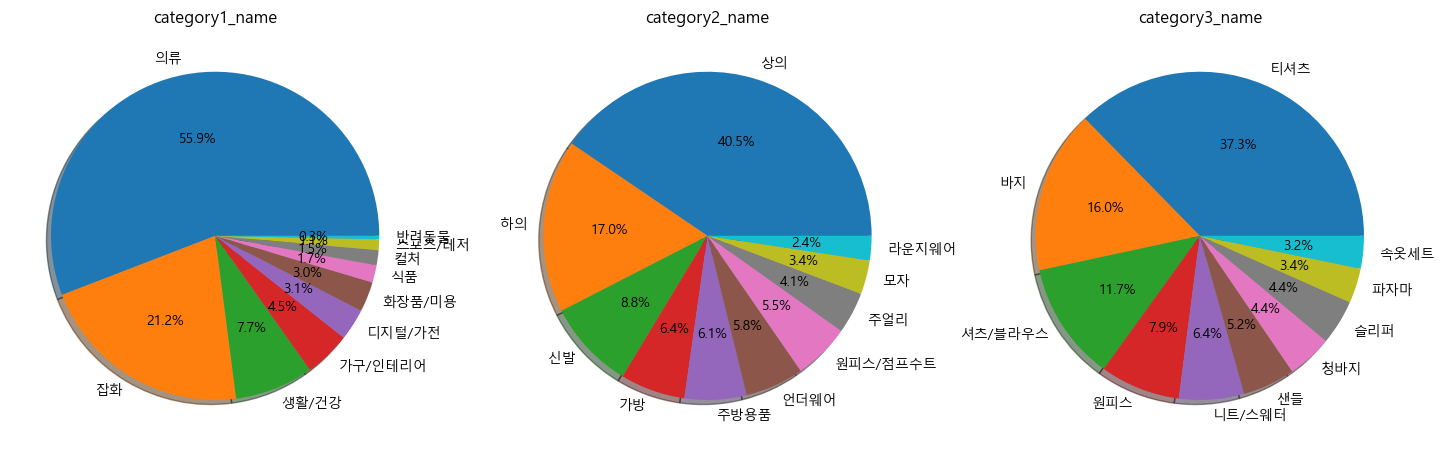

In [17]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))
df.loc[(df.event_name == 'purchase_success'), 'category1_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=True);
ax[0].set_title('category1_name')
ax[0].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category2_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[1], shadow=True);
ax[1].set_title('category2_name')
ax[1].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category3_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[2], shadow=True);
ax[2].set_title('category3_name')
ax[2].set_ylabel('')

plt.show()

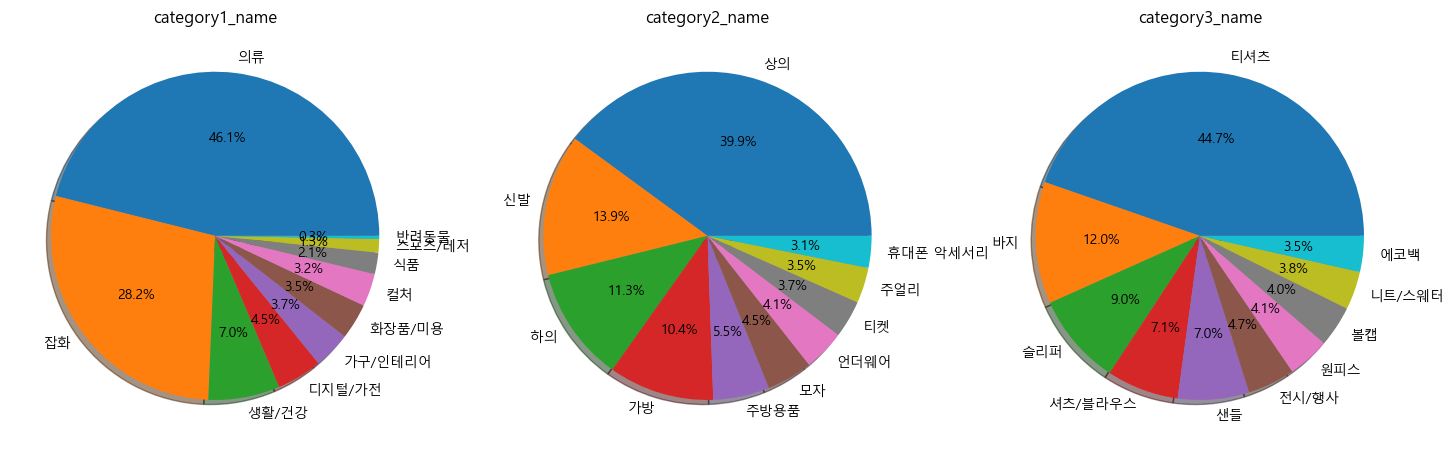

In [18]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))
bdf.loc[(bdf.event_name == 'purchase_success'), 'category1_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=True);
ax[0].set_title('category1_name')
ax[0].set_ylabel('')

bdf.loc[(bdf.event_name == 'purchase_success'), 'category2_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[1], shadow=True);
ax[1].set_title('category2_name')
ax[1].set_ylabel('')

bdf.loc[(bdf.event_name == 'purchase_success'), 'category3_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[2], shadow=True);
ax[2].set_title('category3_name')
ax[2].set_ylabel('')

plt.show()

In [19]:
# 구매자들의 대부분은 한국 유저

df.loc[df['event_name']=='purchase_success', 'country'].value_counts()

South Korea             207575
Taiwan                     164
Japan                      129
Hong Kong                   33
Vietnam                     27
Singapore                   23
United States               20
United Arab Emirates        13
Australia                   13
Canada                      12
China                       11
Malaysia                    10
Indonesia                    6
Thailand                     6
Italy                        5
Qatar                        4
Finland                      3
United Kingdom               1
Lebanon                      1
Name: country, dtype: int64

In [20]:
mapper = {'Gyeonggi-do': '경기도',
         'Seoul': '서울특별시', 
         'Gyeongsangbuk-do': '경상북도', 
         'Busan': '부산광역시', 
         'Ulsan': '울산광역시', 
         'Gyeongsangnam-do': '경상남도', 
         'Chungcheongbuk-do': '충청북도', 
         'Gwangju':'광주광역시', 
         'Chungcheongnam-do': '충청남도',
         'Jeju-do': '제주특별자치도',
         'Jeollanam-do': '전라남도',
         'Daejeon': '대전광역시',
        'Jeollabuk-do': '전라북도',
        'Daegu': '대구광역시',
        'Gangwon-do': '강원도',
        'Incheon': '인천광역시'}

bdf.loc[bdf['country']=='South Korea', 'region'] = bdf.loc[bdf['country']=='South Korea', 'region'].map(mapper)

In [21]:
df_group = df.loc[df['event_name']=='purchase_success'].groupby('user_no').agg({'price' : 'sum', 'age' : 'mean', 'region' : lambda x : x, 'gender' : lambda x : x})
df_group = df_group.reset_index()

In [22]:
bdf_group = bdf.loc[bdf['event_name']=='purchase_success'].groupby('user_no').agg({'price' : 'sum', 'age' : 'mean', 'region' : lambda x : x, 'gender' : lambda x : x})
bdf_group = bdf_group.reset_index()

In [23]:
# 지역 정보 없는 유저 3명 - 서울특별시로 바꿈
df_group.region = df_group.region.fillna('서울특별시')
df_group

user_no      price   age  \
0      ++C4Jco6ku9bc5GwwNuByQ==   436600.0  49.0   
1      ++FBFfYZThncncIvHjLbKQ==  1078500.0  37.0   
2      ++GVOXP4cXADbykjQID0Xw==   898800.0  21.0   
3      ++KVqHvNPHvp3LL9SkuL8A==   225800.0  19.0   
4      ++KjBls4euaEX77FWJaZ/A==  4981600.0  29.0   
...                         ...        ...   ...   
24418  zzFwuJbZhoxI4GAvblPbdw==   414950.0  34.0   
24419  zzLGF7vXyODnAkQWIcqX0g==   639000.0  27.0   
24420  zzQb08qbNg8VZ+c3wMVhuw==   413700.0  51.0   
24421  zzdYrjo38ulKskx8y5+hWw==   208000.0  30.0   
24422  zzq8skPzbmsxokOi5tkZQQ==   940800.0  40.0   

                                                  region  \
0      [Incheon, Incheon, Incheon, Incheon, Incheon, ...   
1      [Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...   
2      [Daegu, Daegu, Daegu, Daegu, Daegu, Daegu, Dae...   
3      [Gangwon-do, Gangwon-do, Gangwon-do, Gangwon-d...   
4      [Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...   
...                                                  ...   
24418  [Gyeonggi-do, Seoul, Seoul, Seoul, Seoul, Seou...   
24419  [Gyeonggi-do, Gyeonggi-do, Gyeonggi-do, Gyeong...   
24420  [Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...   
24421                              [Seoul, Seoul, Seoul]   
24422  [Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...   

                                                  gender  
0             [F, F, F, F, F, F, F, F, F, F, F, F, F, F]  
1                   [M, M, M, M, M, M, M, M, M, M, M, M]  
2                      [M, M, M, M, M, M, M, M, M, M, M]  
3                                        [F, F, F, F, F]  
4      [M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, ...  
...                                                  ...  
24418   [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F]  
24419                                 [F, F, F, F, F, F]  
24420                           [F, F, F, F, F, F, F, F]  
24421                                          [O, O, O]  
24422            [M, M, M, M, M, M, M, M, M, M, M, M, M]  

[24423 rows x 5 columns]

In [24]:
# 지역 정보 없는 유저 3명 - 서울특별시로 바꿈
bdf_group.region = bdf_group.region.fillna('서울특별시')
bdf_group

user_no     price   age  \
0       +++T9c17sr6wEYOy9UFv3w==  274500.0  34.0   
1       +++aQH5NnhiU/9qECKk3uQ==  163000.0  33.0   
2       ++0bwiYVJ/TAsCpxI4UCuw==   88000.0  25.0   
3       ++1HN9s1imztN8ftPCt3LA==   16800.0  38.0   
4       ++2StXdzG0Bj/Kkb5EFcog==   25900.0  25.0   
...                          ...       ...   ...   
122476  zzrBh62TO71nt1GQm+jMjA==  186000.0  44.0   
122477  zzuJMnncH5Wrn/GUA7nqTg==   65000.0  26.0   
122478  zzwYai1YDr0JZQwaTqc0mQ==   52000.0  66.0   
122479  zzwxh/ZL9TPJOWZHLMvnDQ==  209400.0  34.0   
122480  zzzWx+6Z3L2IRJBTgvBs5g==  243000.0  29.0   

                                            region              gender  
0                     [서울특별시, 서울특별시, 서울특별시, 서울특별시]        [M, M, M, M]  
1                                   [서울특별시, 서울특별시]              [F, F]  
2                                            서울특별시                   M  
3                                              강원도                   F  
4                                            서울특별시                   O  
...                                            ...                 ...  
122476                              [서울특별시, 서울특별시]              [F, F]  
122477                                       서울특별시                   F  
122478                                        경상남도                   F  
122479  [서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시]  [O, O, O, O, O, O]  
122480                       [서울특별시, 서울특별시, 인천광역시]           [M, M, M]  

[122481 rows x 5 columns]

In [25]:
# 가장 많이 결제한 지역을 대표 지역으로 선정
from collections import Counter
for row in df_group.iterrows():
    counts2 = Counter(row[1]['gender'])
    if type(row[1]['region']) is np.ndarray :
        counts1 = Counter(row[1]['region'])
        df_group.iloc[row[0], 3] = counts1.most_common(1)[0][0]
    df_group.iloc[row[0], 4] = counts2.most_common(1)[0][0]
        

In [26]:
# 가장 많이 결제한 지역을 대표 지역으로 선정
from collections import Counter
for row in bdf_group.iterrows():
    counts2 = Counter(row[1]['gender'])
    if type(row[1]['region']) is np.ndarray :
        counts1 = Counter(row[1]['region'])
        bdf_group.iloc[row[0], 3] = counts1.most_common(1)[0][0]
    bdf_group.iloc[row[0], 4] = counts2.most_common(1)[0][0]
        

In [27]:
df_group

user_no      price   age       region gender
0      ++C4Jco6ku9bc5GwwNuByQ==   436600.0  49.0      Incheon      F
1      ++FBFfYZThncncIvHjLbKQ==  1078500.0  37.0        Seoul      M
2      ++GVOXP4cXADbykjQID0Xw==   898800.0  21.0        Daegu      M
3      ++KVqHvNPHvp3LL9SkuL8A==   225800.0  19.0   Gangwon-do      F
4      ++KjBls4euaEX77FWJaZ/A==  4981600.0  29.0        Seoul      M
...                         ...        ...   ...          ...    ...
24418  zzFwuJbZhoxI4GAvblPbdw==   414950.0  34.0        Seoul      F
24419  zzLGF7vXyODnAkQWIcqX0g==   639000.0  27.0  Gyeonggi-do      F
24420  zzQb08qbNg8VZ+c3wMVhuw==   413700.0  51.0        Seoul      F
24421  zzdYrjo38ulKskx8y5+hWw==   208000.0  30.0        Seoul      O
24422  zzq8skPzbmsxokOi5tkZQQ==   940800.0  40.0        Seoul      M

[24423 rows x 5 columns]

In [28]:
bdf_group

user_no     price   age region gender
0       +++T9c17sr6wEYOy9UFv3w==  274500.0  34.0  서울특별시      M
1       +++aQH5NnhiU/9qECKk3uQ==  163000.0  33.0  서울특별시      F
2       ++0bwiYVJ/TAsCpxI4UCuw==   88000.0  25.0  서울특별시      M
3       ++1HN9s1imztN8ftPCt3LA==   16800.0  38.0    강원도      F
4       ++2StXdzG0Bj/Kkb5EFcog==   25900.0  25.0  서울특별시      O
...                          ...       ...   ...    ...    ...
122476  zzrBh62TO71nt1GQm+jMjA==  186000.0  44.0  서울특별시      F
122477  zzuJMnncH5Wrn/GUA7nqTg==   65000.0  26.0  서울특별시      F
122478  zzwYai1YDr0JZQwaTqc0mQ==   52000.0  66.0   경상남도      F
122479  zzwxh/ZL9TPJOWZHLMvnDQ==  209400.0  34.0  서울특별시      O
122480  zzzWx+6Z3L2IRJBTgvBs5g==  243000.0  29.0  서울특별시      M

[122481 rows x 5 columns]

In [29]:
value = df_group.region.value_counts()
value = value.reset_index()
value

index  region
0               Seoul   13053
1         Gyeonggi-do    4314
2               Busan    1420
3               Daegu     806
4             Incheon     777
5    Gyeongsangnam-do     557
6   Chungcheongnam-do     510
7             Daejeon     481
8    Gyeongsangbuk-do     397
9             Gwangju     386
10       Jeollabuk-do     339
11  Chungcheongbuk-do     320
12         Gangwon-do     304
13            Jeju-do     253
14       Jeollanam-do     233
15              Ulsan     229
16              Tokyo       5
17     Kaohsiung City       4
18   Ho Chi Minh City       3
19      Taichung City       2
20           Kanagawa       2
21         California       2
22              Aichi       2
23            Saitama       1
24               Doha       1
25    New South Wales       1
26            Tuscany       1
27             Banten       1
28         Binh Duong       1
29              Johor       1
30            Uusimaa       1
31           Victoria       1
32              Dubai       1
33        Taipei City       1
34            Fukuoka       1
35              Osaka       1
36           New York       1
37            Bangkok       1
38            Ontario       1

In [30]:
bvalue = bdf_group.region.value_counts()
bvalue = bvalue.reset_index()
bvalue

index  region
0                               서울특별시   64787
1                                 경기도   20347
2                               부산광역시    8274
3                               대구광역시    4260
4                               인천광역시    3993
5                                경상남도    2908
6                                충청남도    2603
7                               대전광역시    2476
8                               광주광역시    2107
9                                경상북도    2045
10                               전라북도    1787
11                               충청북도    1724
12                                강원도    1518
13                               전라남도    1337
14                              울산광역시    1225
15                            제주특별자치도    1000
16                              Tokyo      14
17                           Kanagawa       6
18                              Hanoi       5
19                   Ho Chi Minh City       4
20                     Kaohsiung City       4
21                            Jakarta       3
22                         California       3
23                              Osaka       3
24                            Bangkok       3
25                       Metro Manila       2
26                           Selangor       2
27  Federal Territory of Kuala Lumpur       2
28                              Aichi       2
29                    New South Wales       2
30                            Saitama       2
31                        Taipei City       2
32                           Dong Nai       1
33                            Sichuan       1
34                           Zhejiang       1
35                              Tunis       1
36                              Dubai       1
37                              Johor       1
38                    New Taipei City       1
39                              Texas       1
40                  Bac Ninh Province       1
41                      Taichung City       1
42                             Berlin       1
43                   British Columbia       1
44                           Hung Yen       1
45                         New Jersey       1
46                           New York       1
47                    Central Visayas       1
48                     Trencin Region       1
49                          Yamaguchi       1
50               Vientiane Prefecture       1

In [31]:
import json

with open('../../29CM_PJT_data/korea_geojson2.geojson', encoding='UTF-8') as f:
    data = json.load(f)
    
for x in data['features']:
    x['id'] = x['properties']['CTP_KOR_NM'] 
    
for idx, _ in enumerate(data['features']):
    print(data['features'][idx]['id'])

강원도
경기도
경상남도
경상북도
광주광역시
대구광역시
대전광역시
부산광역시
서울특별시
세종특별자치시
울산광역시
인천광역시
전라남도
전라북도
제주특별자치도
충청남도
충청북도


### 구매자들 지역 분포

In [32]:
fig = px.choropleth_mapbox(
   bvalue, 
   geojson=data, 
   locations='index', 
   color='region',
   color_continuous_scale=px.colors.sequential.Redor,
   # featureidkey="properties.CTP_KOR_NM", # featureidkey를 사용하여 id 값을 갖는 키값 지정
   mapbox_style="carto-positron",
   zoom=5.5, 
   center = {"lat": 35.757981, "lon": 127.661132},
   opacity=0.6,
   labels={'region':'유저수'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [33]:
df_group

user_no      price   age       region gender
0      ++C4Jco6ku9bc5GwwNuByQ==   436600.0  49.0      Incheon      F
1      ++FBFfYZThncncIvHjLbKQ==  1078500.0  37.0        Seoul      M
2      ++GVOXP4cXADbykjQID0Xw==   898800.0  21.0        Daegu      M
3      ++KVqHvNPHvp3LL9SkuL8A==   225800.0  19.0   Gangwon-do      F
4      ++KjBls4euaEX77FWJaZ/A==  4981600.0  29.0        Seoul      M
...                         ...        ...   ...          ...    ...
24418  zzFwuJbZhoxI4GAvblPbdw==   414950.0  34.0        Seoul      F
24419  zzLGF7vXyODnAkQWIcqX0g==   639000.0  27.0  Gyeonggi-do      F
24420  zzQb08qbNg8VZ+c3wMVhuw==   413700.0  51.0        Seoul      F
24421  zzdYrjo38ulKskx8y5+hWw==   208000.0  30.0        Seoul      O
24422  zzq8skPzbmsxokOi5tkZQQ==   940800.0  40.0        Seoul      M

[24423 rows x 5 columns]

### 구매자들 지역별 성별 분포

In [34]:
pd.crosstab(df_group.region, df_group.gender, margins=True).style.background_gradient(cmap = 'summer_r')

### 구매가 이루어진 물품들의 특징 파악
- 클릭 후 구매까지의 기간 파악
- 구매 물품들의 평균 이벤트 수 

In [35]:
purchase_df = pd.merge(df.loc[df['event_name']=='purchase_success'][['user_no', 'item_no']], df, how='left', on=['user_no', 'item_no'])
purchase_df

user_no                   item_no  \
0       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
1       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
2       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
3       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
4       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
...                          ...                       ...   
626683  a+VESOxVicnmoRFK/nDSNg==  e/FzK1ZQWsGBOmVouLDu/A==   
626684  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626685  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626686  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626687  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   

                  event_timestamp        event_name device_type  \
0      2021-06-10 18:22:24.252014        click_item      mobile   
1      2021-06-10 18:23:16.388027        click_item      mobile   
2      2021-06-10 22:40:50.623004  purchase_success      mobile   
3      2021-06-21 00:24:22.606037        click_item      mobile   
4      2021-06-21 10:18:54.181004  purchase_success      mobile   
...                           ...               ...         ...   
626683 2021-07-14 13:22:48.046026        click_item      mobile   
626684 2021-07-07 18:25:20.619006        click_item      mobile   
626685 2021-07-07 18:25:37.240019        click_item      mobile   
626686 2021-07-07 19:25:02.235006  purchase_success      mobile   
626687 2021-07-14 13:06:46.729069        click_item      mobile   

       mobile_brand_name      country       region  \
0                  Apple  South Korea        Seoul   
1                  Apple  South Korea        Seoul   
2                  Apple  South Korea        Seoul   
3                  Apple  South Korea        Seoul   
4                  Apple  South Korea        Seoul   
...                  ...          ...          ...   
626683             Apple  South Korea  Gyeonggi-do   
626684             Apple  South Korea   Gangwon-do   
626685             Apple  South Korea   Gangwon-do   
626686             Apple  South Korea   Gangwon-do   
626687             Apple  South Korea  Gyeonggi-do   

                          item_name                        image_name  \
0            half box shirt - white  a7ec4395819330a593080f316a2313f6   
1            half box shirt - white  a7ec4395819330a593080f316a2313f6   
2            half box shirt - white  a7ec4395819330a593080f316a2313f6   
3       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
4       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
...                             ...                               ...   
626683                 1 MILE PANTS  da9c04f30c0b96e0bc8b0c0c71521551   
626684      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626685      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626686      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626687      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   

           price category1_name category2_name category3_name brand_name  \
0       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
1       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
2       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
3        59000.0             의류             상의         니트/스웨터    fadeiin   
4        59000.0             의류             상의         니트/스웨터    fadeiin   
...          ...            ...            ...            ...        ...   
626683   69000.0           성년의날             하의             바지    hideout   
626684   49000.0             의류             하의             바지    hideout   
626685   49000.0             의류             하의             바지    hideout   
626686   49000.0             의류             하의             바지    hideout   
626687   49000.0             의류             하의             바지    hideout   

       birth_date gender  age  
0   

In [36]:
purchase_bdf = pd.merge(bdf.loc[bdf['event_name']=='purchase_success'][['user_no', 'item_no']], bdf, how='left', on=['user_no', 'item_no'])
purchase_bdf

user_no                   item_no  \
0       ++MXKfwkOw4VFn9HkVCRrw==  81bU+PH0P710T+PlLX0xVw==   
1       ++MXKfwkOw4VFn9HkVCRrw==  ki9u7/jk7e7f73OG0ym5Mw==   
2       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
3       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
4       ++MXKfwkOw4VFn9HkVCRrw==  8aFmZvKPI/a+3CuFUlpAtQ==   
...                          ...                       ...   
503872  zxrU6ChTpx87iU5KNRbmAA==  MkOPhEDwj6R56pxpQZKeww==   
503873  zzblhcY6j0rWP7m/5w6kqg==  XtyIqPGx3i4PVhmxYy+OQg==   
503874  zzzWx+6Z3L2IRJBTgvBs5g==  b9M/fPRnkCuV9cSaw0cp3w==   
503875  zzzWx+6Z3L2IRJBTgvBs5g==  9ltNUyvoS0mvECvQtrGBVw==   
503876  zzzWx+6Z3L2IRJBTgvBs5g==  qnG9YZ0unGLOvlBe5KpbEQ==   

                  event_timestamp        event_name device_type  \
0      2021-07-11 21:20:40.691004  purchase_success      mobile   
1      2021-07-11 21:20:40.692005  purchase_success      mobile   
2      2021-07-18 01:04:44.564049        click_item      mobile   
3      2021-07-18 01:09:43.447004  purchase_success      mobile   
4      2021-07-18 01:09:43.449005  purchase_success      mobile   
...                           ...               ...         ...   
503872 2021-07-02 00:25:46.571004  purchase_success      mobile   
503873 2021-06-06 18:40:58.621004  purchase_success      mobile   
503874 2021-06-15 17:04:26.205004  purchase_success      mobile   
503875 2021-06-15 17:04:26.206005  purchase_success      mobile   
503876 2021-07-04 00:25:00.662004  purchase_success      mobile   

       mobile_brand_name      country region  \
0                  Apple  South Korea   경상남도   
1                  Apple  South Korea   경상남도   
2                  Apple  South Korea  부산광역시   
3                  Apple  South Korea  부산광역시   
4                  Apple  South Korea  부산광역시   
...                  ...          ...    ...   
503872             Apple  South Korea  울산광역시   
503873             Apple  South Korea   충청북도   
503874             Apple  South Korea  서울특별시   
503875             Apple  South Korea  서울특별시   
503876             Apple  South Korea  인천광역시   

                                                item_name  \
0                        47브랜드 빅로고 NY 양키스 클린업 아일랜드레드 / IR   
1       UNISEX TAKE CARE TEDDY T-SHIRT OFF WHITE_UDTS1...   
2                      MARITHE CLASSIC LOGO TEE off white   
3                      MARITHE CLASSIC LOGO TEE off white   
4                                  CLASSIC T-SHIRT (6COL)   
...                                                   ...   
503872                                  ts9205 그레이웨일티 내추럴   
503873  [MEDUSE] 메듀즈 샌들  Womens  SUN  (Argent paillett...   
503874                      21SS Writer Shirt (Dove Gray)   
503875                      21SS Writer Shirt (Clear Sky)   
503876             Half Sleeved Collar Knit (Olive Khaki)   

                              image_name    price category1_name  \
0       d423235ef8cca742b3907902845762cb  49000.0             잡화   
1       4f639f6435dc62459296348ae4a81fca  45000.0             의류   
2       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
3       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
4       bb797eb7291e94a9eec47c7ed7614004  25000.0             의류   
...                                  ...      ...            ...   
503872  c99ec3e289b4a07d46c5c4d7c2b43dd3  27500.0             의류   
503873  c02498011dd10d086fea5b813aa35086  38000.0             잡화   
503874  7af78fd6bfe2f10a51d0ddc4e2350a28  87000.0             의류   
503875  25294cb0caf2b52fc05f10fed893e43d  87000.0             의류   
503876  e04c7a5b65df3b567c011dc5dabc389f  69000.0             의류   

       category2_name category3_name                brand_name birth_date  \
0                  모자             볼캡                47brand_이든 1994-08-25   
1                  상의            티셔츠                     DUNST 1994-08-25   
2                  상의            티셔츠  MARITHE FRANCOIS GIRBAUD 1994-08-25   
3                  상의            티셔츠  MA

In [37]:
purchase_df['event_duration'] = 0

In [38]:
purchase_bdf['event_duration'] = 0

In [39]:
purchase_df['event_count'] = 0

In [40]:
purchase_bdf['event_count'] = 0

In [41]:
start = purchase_df.iloc[0]
count = 0
for row in purchase_df.iterrows():
    if row[1]['item_no'] != start['item_no']:
        start = row[1]        
        count = 0
    count+=1
    if row[1]['event_name'] == 'purchase_success':
        purchase_df.event_duration[row[0]] = row[1]['event_timestamp'] - start['event_timestamp']
        purchase_df.event_count[row[0]]=count
    

In [42]:
start = purchase_bdf.iloc[0]
count = 0
for row in purchase_bdf.iterrows():
    if row[1]['item_no'] != start['item_no']:
        start = row[1]        
        count = 0
    count+=1
    if row[1]['event_name'] == 'purchase_success':
        purchase_bdf.event_duration[row[0]] = row[1]['event_timestamp'] - start['event_timestamp']
        purchase_bdf.event_count[row[0]]=count
    

In [43]:
purchase_df

user_no                   item_no  \
0       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
1       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
2       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
3       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
4       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
...                          ...                       ...   
626683  a+VESOxVicnmoRFK/nDSNg==  e/FzK1ZQWsGBOmVouLDu/A==   
626684  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626685  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626686  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626687  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   

                  event_timestamp        event_name device_type  \
0      2021-06-10 18:22:24.252014        click_item      mobile   
1      2021-06-10 18:23:16.388027        click_item      mobile   
2      2021-06-10 22:40:50.623004  purchase_success      mobile   
3      2021-06-21 00:24:22.606037        click_item      mobile   
4      2021-06-21 10:18:54.181004  purchase_success      mobile   
...                           ...               ...         ...   
626683 2021-07-14 13:22:48.046026        click_item      mobile   
626684 2021-07-07 18:25:20.619006        click_item      mobile   
626685 2021-07-07 18:25:37.240019        click_item      mobile   
626686 2021-07-07 19:25:02.235006  purchase_success      mobile   
626687 2021-07-14 13:06:46.729069        click_item      mobile   

       mobile_brand_name      country       region  \
0                  Apple  South Korea        Seoul   
1                  Apple  South Korea        Seoul   
2                  Apple  South Korea        Seoul   
3                  Apple  South Korea        Seoul   
4                  Apple  South Korea        Seoul   
...                  ...          ...          ...   
626683             Apple  South Korea  Gyeonggi-do   
626684             Apple  South Korea   Gangwon-do   
626685             Apple  South Korea   Gangwon-do   
626686             Apple  South Korea   Gangwon-do   
626687             Apple  South Korea  Gyeonggi-do   

                          item_name                        image_name  \
0            half box shirt - white  a7ec4395819330a593080f316a2313f6   
1            half box shirt - white  a7ec4395819330a593080f316a2313f6   
2            half box shirt - white  a7ec4395819330a593080f316a2313f6   
3       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
4       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
...                             ...                               ...   
626683                 1 MILE PANTS  da9c04f30c0b96e0bc8b0c0c71521551   
626684      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626685      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626686      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626687      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   

           price category1_name category2_name category3_name brand_name  \
0       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
1       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
2       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
3        59000.0             의류             상의         니트/스웨터    fadeiin   
4        59000.0             의류             상의         니트/스웨터    fadeiin   
...          ...            ...            ...            ...        ...   
626683   69000.0           성년의날             하의             바지    hideout   
626684   49000.0             의류             하의             바지    hideout   
626685   49000.0             의류             하의             바지    hideout   
626686   49000.0             의류             하의             바지    hideout   
626687   49000.0             의류             하의             바지    hideout   

       birth_date gender  age       

In [44]:
purchase_bdf = purchase_bdf[['user_no', 'item_no', 'event_timestamp', 'event_name', 'event_duration',
       'event_count', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_name', 'category2_name', 'category3_name',
       'brand_name', 'birth_date', 'gender', 'age']]
purchase_bdf

user_no                   item_no  \
0       ++MXKfwkOw4VFn9HkVCRrw==  81bU+PH0P710T+PlLX0xVw==   
1       ++MXKfwkOw4VFn9HkVCRrw==  ki9u7/jk7e7f73OG0ym5Mw==   
2       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
3       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
4       ++MXKfwkOw4VFn9HkVCRrw==  8aFmZvKPI/a+3CuFUlpAtQ==   
...                          ...                       ...   
503872  zxrU6ChTpx87iU5KNRbmAA==  MkOPhEDwj6R56pxpQZKeww==   
503873  zzblhcY6j0rWP7m/5w6kqg==  XtyIqPGx3i4PVhmxYy+OQg==   
503874  zzzWx+6Z3L2IRJBTgvBs5g==  b9M/fPRnkCuV9cSaw0cp3w==   
503875  zzzWx+6Z3L2IRJBTgvBs5g==  9ltNUyvoS0mvECvQtrGBVw==   
503876  zzzWx+6Z3L2IRJBTgvBs5g==  qnG9YZ0unGLOvlBe5KpbEQ==   

                  event_timestamp        event_name          event_duration  \
0      2021-07-11 21:20:40.691004  purchase_success         0 days 00:00:00   
1      2021-07-11 21:20:40.692005  purchase_success         0 days 00:00:00   
2      2021-07-18 01:04:44.564049        click_item                       0   
3      2021-07-18 01:09:43.447004  purchase_success  0 days 00:04:58.882955   
4      2021-07-18 01:09:43.449005  purchase_success         0 days 00:00:00   
...                           ...               ...                     ...   
503872 2021-07-02 00:25:46.571004  purchase_success         0 days 00:00:00   
503873 2021-06-06 18:40:58.621004  purchase_success         0 days 00:00:00   
503874 2021-06-15 17:04:26.205004  purchase_success         0 days 00:00:00   
503875 2021-06-15 17:04:26.206005  purchase_success         0 days 00:00:00   
503876 2021-07-04 00:25:00.662004  purchase_success         0 days 00:00:00   

        event_count device_type mobile_brand_name      country region  \
0                 1      mobile             Apple  South Korea   경상남도   
1                 1      mobile             Apple  South Korea   경상남도   
2                 0      mobile             Apple  South Korea  부산광역시   
3                 2      mobile             Apple  South Korea  부산광역시   
4                 1      mobile             Apple  South Korea  부산광역시   
...             ...         ...               ...          ...    ...   
503872            1      mobile             Apple  South Korea  울산광역시   
503873            1      mobile             Apple  South Korea   충청북도   
503874            1      mobile             Apple  South Korea  서울특별시   
503875            1      mobile             Apple  South Korea  서울특별시   
503876            1      mobile             Apple  South Korea  인천광역시   

                                                item_name  \
0                        47브랜드 빅로고 NY 양키스 클린업 아일랜드레드 / IR   
1       UNISEX TAKE CARE TEDDY T-SHIRT OFF WHITE_UDTS1...   
2                      MARITHE CLASSIC LOGO TEE off white   
3                      MARITHE CLASSIC LOGO TEE off white   
4                                  CLASSIC T-SHIRT (6COL)   
...                                                   ...   
503872                                  ts9205 그레이웨일티 내추럴   
503873  [MEDUSE] 메듀즈 샌들  Womens  SUN  (Argent paillett...   
503874                      21SS Writer Shirt (Dove Gray)   
503875                      21SS Writer Shirt (Clear Sky)   
503876             Half Sleeved Collar Knit (Olive Khaki)   

                              image_name    price category1_name  \
0       d423235ef8cca742b3907902845762cb  49000.0             잡화   
1       4f639f6435dc62459296348ae4a81fca  45000.0             의류   
2       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
3       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
4       bb797eb7291e94a9eec47c7ed7614004  25000.0             의류   
...                                  ...      ...            ...   
503872  c99ec3e289b4a07d46c5c4d7c2b43dd3  27500.0             의류   
503873  c02498011dd10d086fea5b813aa35086  38000.0             잡화   
503874  7af78fd6bfe2f10a51d0ddc4e2350a28  87000.0             의류   
503875  25294cb0caf2b52fc05f10fed893e43d 

In [45]:
purchase_df.loc[purchase_df['event_duration']!=0]

user_no                   item_no  \
2       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
4       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
6       BbMDxDofKWmrkqGJGjZRjA==  ItUK586vWTWmvMg8DvxtMA==   
7       BbMDxDofKWmrkqGJGjZRjA==  f67bsEiWtq7Y8WbXayeS4w==   
8       BbMDxDofKWmrkqGJGjZRjA==  Yj0cYBIkHzicyYKyGFqcsQ==   
...                          ...                       ...   
626678  a+VESOxVicnmoRFK/nDSNg==  yXpbzgtgRe37PEbJlBiKmQ==   
626679  a+VESOxVicnmoRFK/nDSNg==  yXpbzgtgRe37PEbJlBiKmQ==   
626680  a+VESOxVicnmoRFK/nDSNg==  hrxsRVJ3wyP/eMTYEgUBLw==   
626681  a+VESOxVicnmoRFK/nDSNg==  e/FzK1ZQWsGBOmVouLDu/A==   
626686  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   

                  event_timestamp        event_name device_type  \
2      2021-06-10 22:40:50.623004  purchase_success      mobile   
4      2021-06-21 10:18:54.181004  purchase_success      mobile   
6      2021-06-21 10:18:54.182005  purchase_success      mobile   
7      2021-07-04 13:07:42.112004  purchase_success      mobile   
8      2021-07-04 13:07:42.113005  purchase_success      mobile   
...                           ...               ...         ...   
626678 2021-06-10 13:39:56.906005  purchase_success      mobile   
626679 2021-06-15 09:35:27.059006  purchase_success      mobile   
626680 2021-07-07 19:25:02.232004  purchase_success      mobile   
626681 2021-07-07 19:25:02.234005  purchase_success      mobile   
626686 2021-07-07 19:25:02.235006  purchase_success      mobile   

       mobile_brand_name      country       region  \
2                  Apple  South Korea        Seoul   
4                  Apple  South Korea        Seoul   
6                  Apple  South Korea        Seoul   
7                  Apple  South Korea        Daegu   
8                  Apple  South Korea        Daegu   
...                  ...          ...          ...   
626678             Apple  South Korea  Gyeonggi-do   
626679             Apple  South Korea        Seoul   
626680             Apple  South Korea   Gangwon-do   
626681             Apple  South Korea   Gangwon-do   
626686             Apple  South Korea   Gangwon-do   

                                   item_name  \
2                     half box shirt - white   
4                Vert Sleeveless Knit (navy)   
6                  Vert Half Cardigan (navy)   
7                   뮤트 베이직 밴드 블루그레이 브라 팬티 세트   
8                       미니라벨 스킨 베이직 브라 팬티 세트   
...                                      ...   
626678  [예약판매][락피쉬웨더웨어] 파스텔 첼시 레인부츠 - 3color   
626679  [예약판매][락피쉬웨더웨어] 파스텔 첼시 레인부츠 - 3color   
626680     SEERSUCKER EGG PANTS(Light Khaki)   
626681                          1 MILE PANTS   
626686               1 MILE HALF PANTS(blue)   

                              image_name     price category1_name  \
2       a7ec4395819330a593080f316a2313f6  147000.0             의류   
4       b2edd3ea7a27979802c876899e4b0e55   59000.0             의류   
6       24ae3a9fee6b91f1010b80589bc19e51  112000.0             의류   
7       a6c98d16c70fead3d03fe6d410a9fd3b   52000.0             의류   
8       aae5e316b68e9ddc0a495e8fba8ce165   52000.0             의류   
...                                  ...       ...            ...   
626678  d94b95bf191a86da2ef681ef61fb6bd9   59000.0             잡화   
626679  d94b95bf191a86da2ef681ef61fb6bd9   59000.0             잡화   
626680  6c89c6d63a1ba5061b85e476073e23c0   79000.0             의류   
626681  da9c04f30c0b96e0bc8b0c0c71521551   69000.0           성년의날   
626686  079380df64e08d71cfc18186c7184a69   49000.0             의류   

       category2_name category3_name            brand_name birth_date gender  \
2                  상의        셔츠/블라우스              MOIA(매입) 1994-03-02      F   
4                  상의         니트/스웨터               fadeiin 1994-03-02      F   
6                  상의            카디건               fadeiin 1994-03-02      F   
7                언더웨어           속옷세트     codescombineinner 1994-03-02      F   
8                언더웨

In [46]:
purchase_df.groupby('category2_name').mean()

price        age  event_count
category2_name                                       
가공식품             21399.927679  39.001972     4.545036
가구_OLD           13659.459459  41.459459     2.054054
가방               87158.445219  33.900736     2.233256
강아지 용품           44467.084942  35.289575     2.040541
거실가구            189442.333333  36.883333     1.826667
...                       ...        ...          ...
헤어케어             30470.774648  36.299883     1.717136
헬스               32373.622047  37.935039     1.803150
홈데코              24869.752187  40.234329     6.927478
홈웨어              42920.000000  42.600000     1.000000
휴대폰 악세서리         22656.428124  34.913718     2.070153

[90 rows x 3 columns]

In [47]:
for row in purchase_df.iterrows():
    if row[1]['event_duration']!=0:
        purchase_df.event_duration[row[0]]=(row[1]['event_duration'].to_pytimedelta()//60).seconds
    

In [48]:
for row in purchase_bdf.iterrows():
    if row[1]['event_duration']!=0:
        purchase_bdf.event_duration[row[0]]=(row[1]['event_duration'].to_pytimedelta()//60).seconds
    

In [49]:
purchase_df

user_no                   item_no  \
0       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
1       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
2       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
3       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
4       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
...                          ...                       ...   
626683  a+VESOxVicnmoRFK/nDSNg==  e/FzK1ZQWsGBOmVouLDu/A==   
626684  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626685  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626686  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
626687  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   

                  event_timestamp        event_name device_type  \
0      2021-06-10 18:22:24.252014        click_item      mobile   
1      2021-06-10 18:23:16.388027        click_item      mobile   
2      2021-06-10 22:40:50.623004  purchase_success      mobile   
3      2021-06-21 00:24:22.606037        click_item      mobile   
4      2021-06-21 10:18:54.181004  purchase_success      mobile   
...                           ...               ...         ...   
626683 2021-07-14 13:22:48.046026        click_item      mobile   
626684 2021-07-07 18:25:20.619006        click_item      mobile   
626685 2021-07-07 18:25:37.240019        click_item      mobile   
626686 2021-07-07 19:25:02.235006  purchase_success      mobile   
626687 2021-07-14 13:06:46.729069        click_item      mobile   

       mobile_brand_name      country       region  \
0                  Apple  South Korea        Seoul   
1                  Apple  South Korea        Seoul   
2                  Apple  South Korea        Seoul   
3                  Apple  South Korea        Seoul   
4                  Apple  South Korea        Seoul   
...                  ...          ...          ...   
626683             Apple  South Korea  Gyeonggi-do   
626684             Apple  South Korea   Gangwon-do   
626685             Apple  South Korea   Gangwon-do   
626686             Apple  South Korea   Gangwon-do   
626687             Apple  South Korea  Gyeonggi-do   

                          item_name                        image_name  \
0            half box shirt - white  a7ec4395819330a593080f316a2313f6   
1            half box shirt - white  a7ec4395819330a593080f316a2313f6   
2            half box shirt - white  a7ec4395819330a593080f316a2313f6   
3       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
4       Vert Sleeveless Knit (navy)  b2edd3ea7a27979802c876899e4b0e55   
...                             ...                               ...   
626683                 1 MILE PANTS  da9c04f30c0b96e0bc8b0c0c71521551   
626684      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626685      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626686      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   
626687      1 MILE HALF PANTS(blue)  079380df64e08d71cfc18186c7184a69   

           price category1_name category2_name category3_name brand_name  \
0       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
1       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
2       147000.0             의류             상의        셔츠/블라우스   MOIA(매입)   
3        59000.0             의류             상의         니트/스웨터    fadeiin   
4        59000.0             의류             상의         니트/스웨터    fadeiin   
...          ...            ...            ...            ...        ...   
626683   69000.0           성년의날             하의             바지    hideout   
626684   49000.0             의류             하의             바지    hideout   
626685   49000.0             의류             하의             바지    hideout   
626686   49000.0             의류             하의             바지    hideout   
626687   49000.0             의류             하의             바지    hideout   

       birth_date gender  age event_

In [50]:
purchase_bdf

user_no                   item_no  \
0       ++MXKfwkOw4VFn9HkVCRrw==  81bU+PH0P710T+PlLX0xVw==   
1       ++MXKfwkOw4VFn9HkVCRrw==  ki9u7/jk7e7f73OG0ym5Mw==   
2       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
3       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
4       ++MXKfwkOw4VFn9HkVCRrw==  8aFmZvKPI/a+3CuFUlpAtQ==   
...                          ...                       ...   
503872  zxrU6ChTpx87iU5KNRbmAA==  MkOPhEDwj6R56pxpQZKeww==   
503873  zzblhcY6j0rWP7m/5w6kqg==  XtyIqPGx3i4PVhmxYy+OQg==   
503874  zzzWx+6Z3L2IRJBTgvBs5g==  b9M/fPRnkCuV9cSaw0cp3w==   
503875  zzzWx+6Z3L2IRJBTgvBs5g==  9ltNUyvoS0mvECvQtrGBVw==   
503876  zzzWx+6Z3L2IRJBTgvBs5g==  qnG9YZ0unGLOvlBe5KpbEQ==   

                  event_timestamp        event_name event_duration  \
0      2021-07-11 21:20:40.691004  purchase_success              0   
1      2021-07-11 21:20:40.692005  purchase_success              0   
2      2021-07-18 01:04:44.564049        click_item              0   
3      2021-07-18 01:09:43.447004  purchase_success              4   
4      2021-07-18 01:09:43.449005  purchase_success              0   
...                           ...               ...            ...   
503872 2021-07-02 00:25:46.571004  purchase_success              0   
503873 2021-06-06 18:40:58.621004  purchase_success              0   
503874 2021-06-15 17:04:26.205004  purchase_success              0   
503875 2021-06-15 17:04:26.206005  purchase_success              0   
503876 2021-07-04 00:25:00.662004  purchase_success              0   

        event_count device_type mobile_brand_name      country region  \
0                 1      mobile             Apple  South Korea   경상남도   
1                 1      mobile             Apple  South Korea   경상남도   
2                 0      mobile             Apple  South Korea  부산광역시   
3                 2      mobile             Apple  South Korea  부산광역시   
4                 1      mobile             Apple  South Korea  부산광역시   
...             ...         ...               ...          ...    ...   
503872            1      mobile             Apple  South Korea  울산광역시   
503873            1      mobile             Apple  South Korea   충청북도   
503874            1      mobile             Apple  South Korea  서울특별시   
503875            1      mobile             Apple  South Korea  서울특별시   
503876            1      mobile             Apple  South Korea  인천광역시   

                                                item_name  \
0                        47브랜드 빅로고 NY 양키스 클린업 아일랜드레드 / IR   
1       UNISEX TAKE CARE TEDDY T-SHIRT OFF WHITE_UDTS1...   
2                      MARITHE CLASSIC LOGO TEE off white   
3                      MARITHE CLASSIC LOGO TEE off white   
4                                  CLASSIC T-SHIRT (6COL)   
...                                                   ...   
503872                                  ts9205 그레이웨일티 내추럴   
503873  [MEDUSE] 메듀즈 샌들  Womens  SUN  (Argent paillett...   
503874                      21SS Writer Shirt (Dove Gray)   
503875                      21SS Writer Shirt (Clear Sky)   
503876             Half Sleeved Collar Knit (Olive Khaki)   

                              image_name    price category1_name  \
0       d423235ef8cca742b3907902845762cb  49000.0             잡화   
1       4f639f6435dc62459296348ae4a81fca  45000.0             의류   
2       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
3       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
4       bb797eb7291e94a9eec47c7ed7614004  25000.0             의류   
...                                  ...      ...            ...   
503872  c99ec3e289b4a07d46c5c4d7c2b43dd3  27500.0             의류   
503873  c02498011dd10d086fea5b813aa35086  38000.0             잡화   
503874  7af78fd6bfe2f10a51d0ddc4e2350a28  87000.0             의류   
503875  25294cb0caf2b52fc05f10fed893e43d  87000.0             의류   
503876  e04c7a5b65df3b567c011dc5dabc389f  69000.0             의류   

       categ

In [51]:
list1 = purchase_df.loc[purchase_df['event_name']=='purchase_success']['category2_name'].value_counts()[:10].index
list1

Index(['상의', '하의', '신발', '언더웨어', '주방용품', '가방', '원피스/점프수트', '주얼리', '양말', '모자'], dtype='object')

In [52]:
list2 = purchase_bdf.loc[purchase_bdf['event_name']=='purchase_success']['category2_name'].value_counts()[:10].index
list2

Index(['상의', '신발', '하의', '가방', '주방용품', '언더웨어', '티켓', '모자', '주얼리', '양말'], dtype='object')

C:\Users\94dng\AppData\Local\Temp\ipykernel_6036\819640985.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



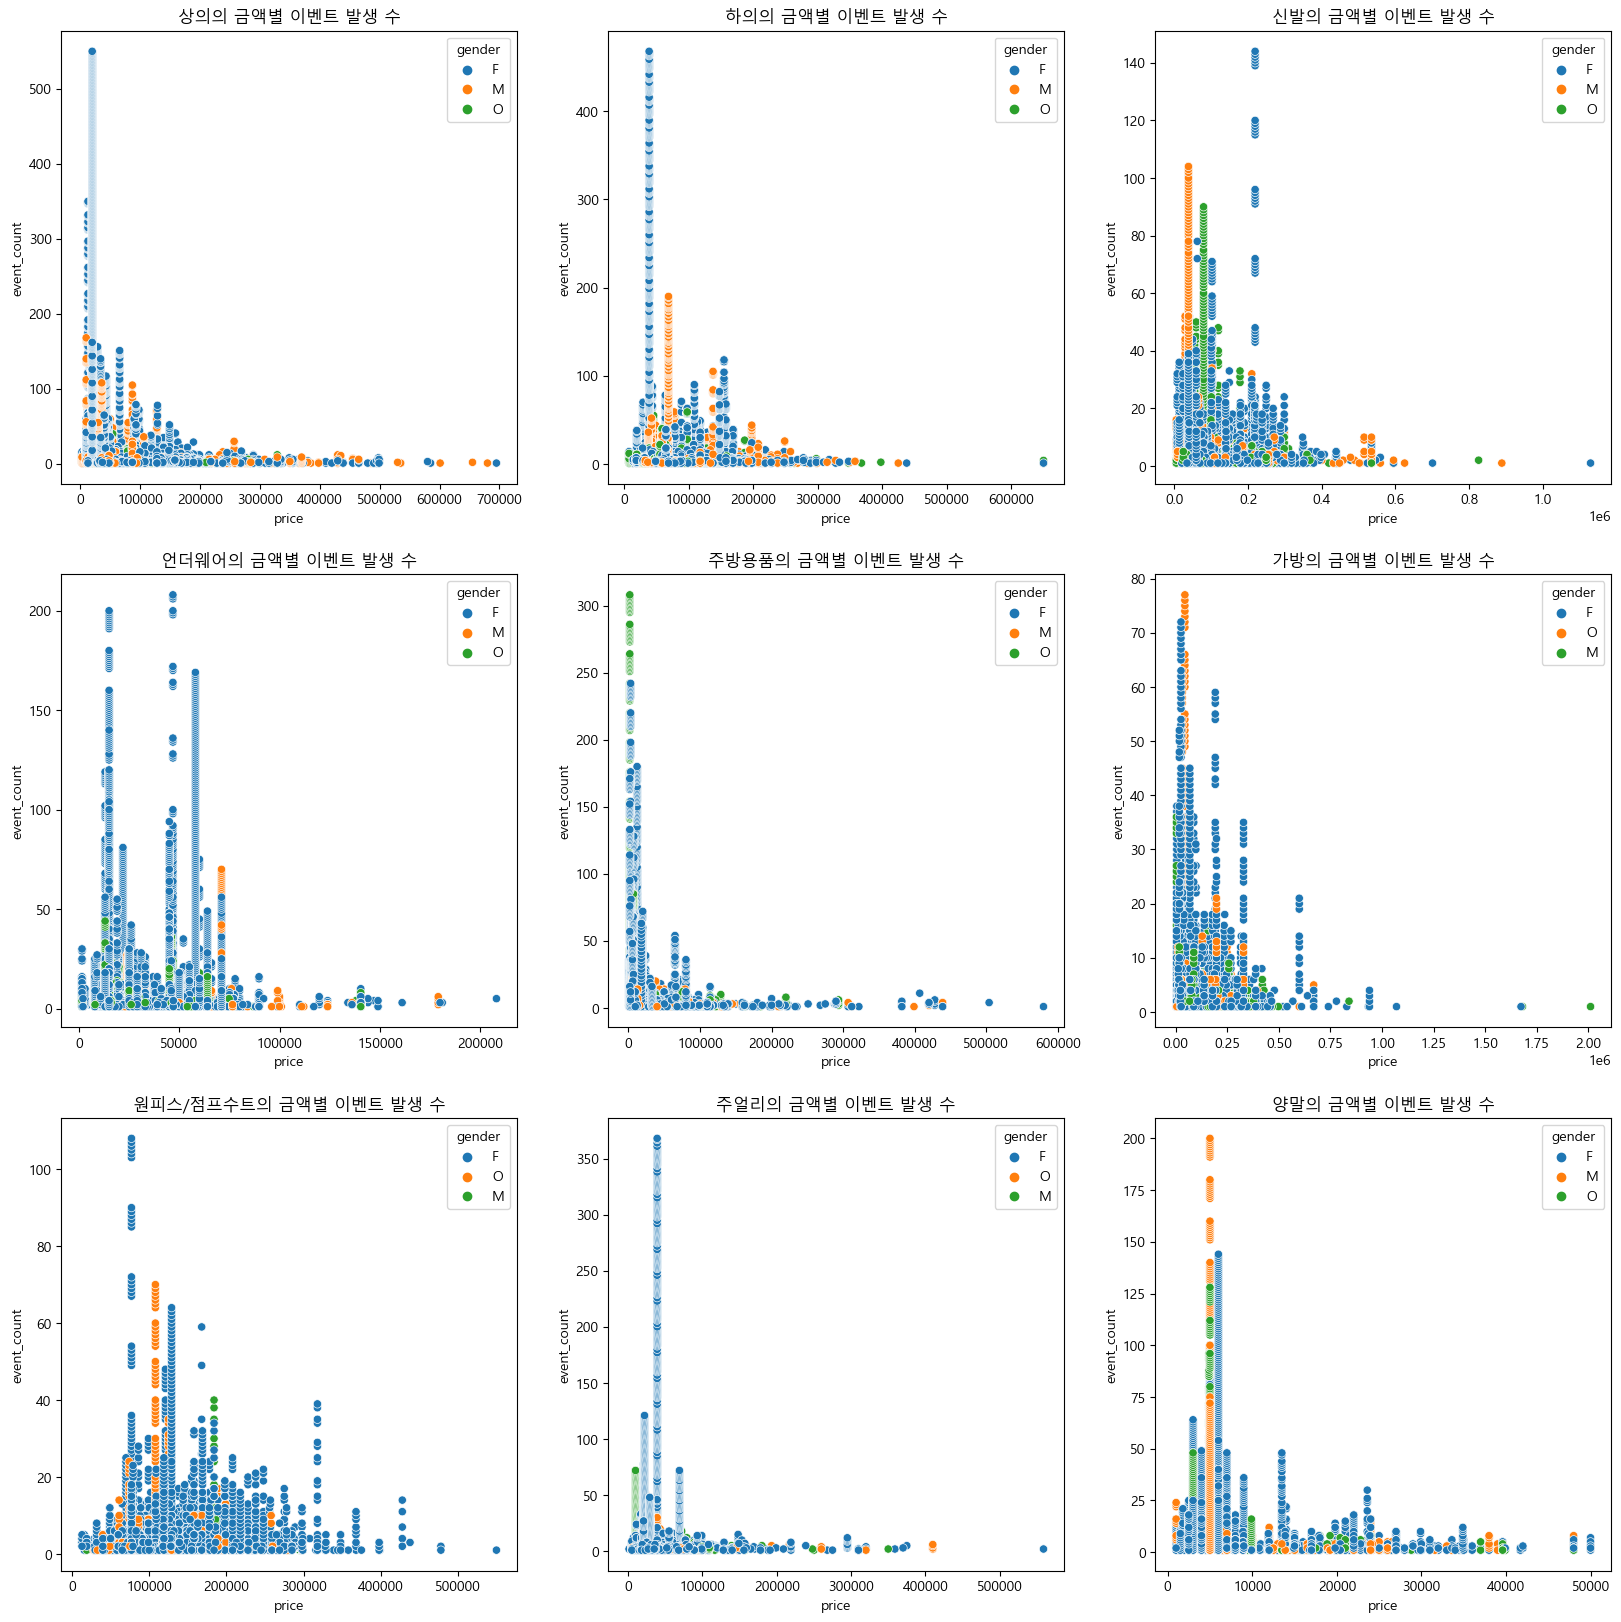

In [53]:
f, ax = plt.subplots(3, 3, figsize=(20, 20))

for idx, name in enumerate(list1[:9]):
    sns.scatterplot(data=purchase_df.loc[((purchase_df['event_name']=='purchase_success')&(purchase_df['category2_name']==name))], 
                x='price', y='event_count', hue='gender', ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(f'{name}의 금액별 이벤트 발생 수')
f.show()

C:\Users\94dng\AppData\Local\Temp\ipykernel_6036\3472570517.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



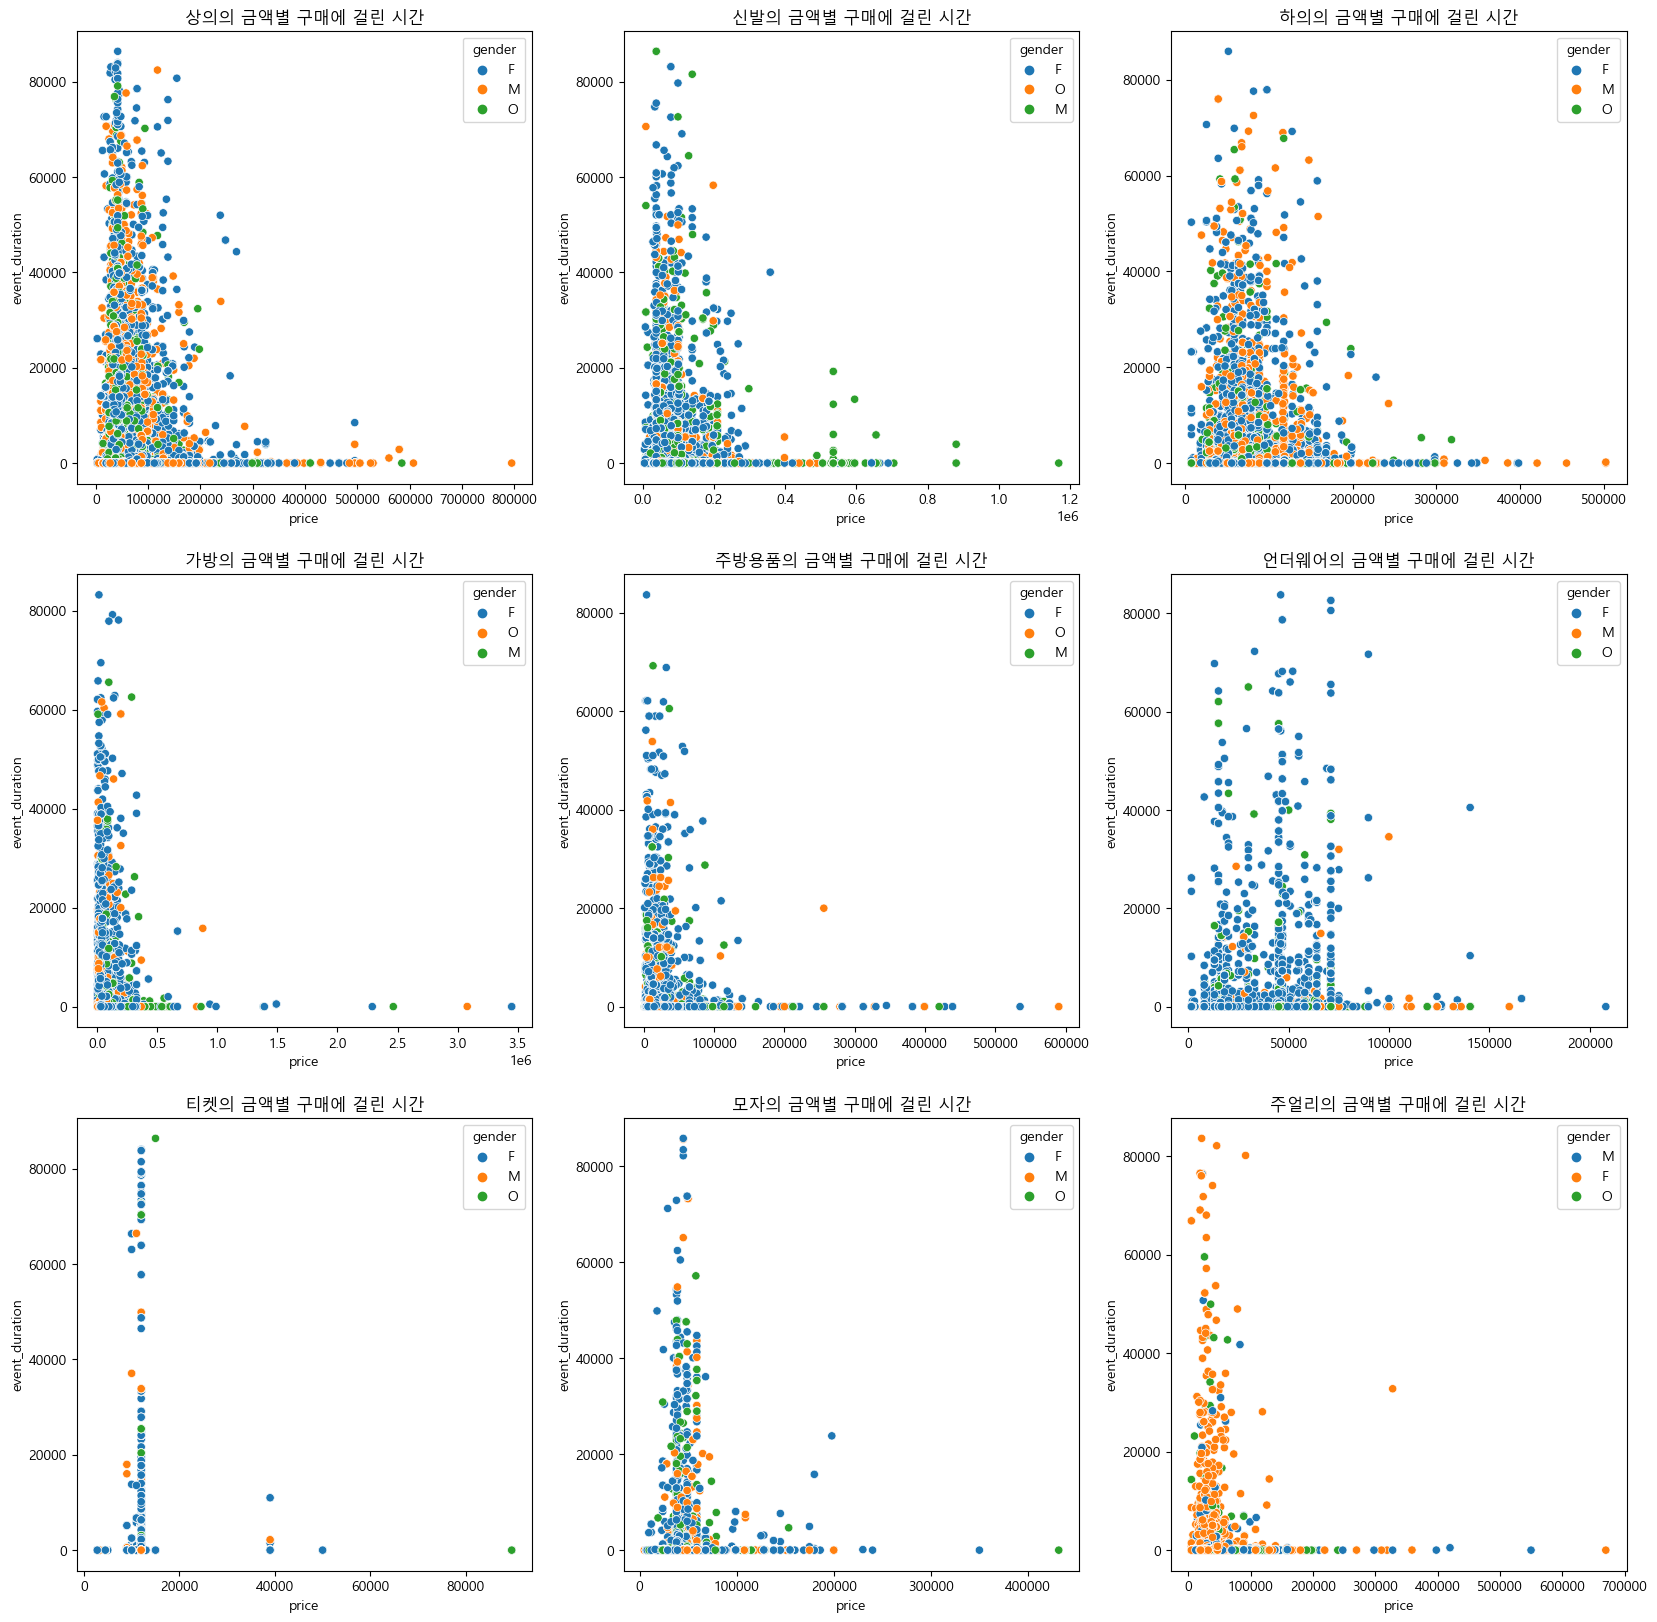

In [54]:
f, ax = plt.subplots(3, 3, figsize=(20, 20))

for idx, name in enumerate(list2[:9]):
    sns.scatterplot(data=purchase_bdf.loc[((purchase_bdf['event_name']=='purchase_success')&(purchase_bdf['category2_name']==name))], 
                x='price', y='event_duration', hue='gender', ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(f'{name}의 금액별 구매에 걸린 시간')
f.show()

In [55]:
event_df.loc[event_df.country!='South Korea'].user_no.value_counts()

UyNDMz6yeRNyvfpqOQQWkQ==    622
HyqVjFJ3m/0T8jBzzVQC/Q==    602
y0HwlQ1Je8whPHbOqAPiSw==    478
1lTK1l+r4ZkJZwFhC4ujOA==    405
MuCpcrIFpRv9tQapAed9hw==    396
                           ... 
97Oe9dmaMYC7wQk8qWkv+g==      1
pxidcMdfA7Gr7ipmE5SFiA==      1
j4iao5wBuF0QPuHWwhvaSA==      1
p2gw2leYdLzXqSql+UGyKQ==      1
NkEG7EBtK4+eftPX5SUXlg==      1
Name: user_no, Length: 841, dtype: int64

In [56]:
purchase_bdf

user_no                   item_no  \
0       ++MXKfwkOw4VFn9HkVCRrw==  81bU+PH0P710T+PlLX0xVw==   
1       ++MXKfwkOw4VFn9HkVCRrw==  ki9u7/jk7e7f73OG0ym5Mw==   
2       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
3       ++MXKfwkOw4VFn9HkVCRrw==  Brpuj5YERIKbzKbDM/3OBg==   
4       ++MXKfwkOw4VFn9HkVCRrw==  8aFmZvKPI/a+3CuFUlpAtQ==   
...                          ...                       ...   
503872  zxrU6ChTpx87iU5KNRbmAA==  MkOPhEDwj6R56pxpQZKeww==   
503873  zzblhcY6j0rWP7m/5w6kqg==  XtyIqPGx3i4PVhmxYy+OQg==   
503874  zzzWx+6Z3L2IRJBTgvBs5g==  b9M/fPRnkCuV9cSaw0cp3w==   
503875  zzzWx+6Z3L2IRJBTgvBs5g==  9ltNUyvoS0mvECvQtrGBVw==   
503876  zzzWx+6Z3L2IRJBTgvBs5g==  qnG9YZ0unGLOvlBe5KpbEQ==   

                  event_timestamp        event_name event_duration  \
0      2021-07-11 21:20:40.691004  purchase_success              0   
1      2021-07-11 21:20:40.692005  purchase_success              0   
2      2021-07-18 01:04:44.564049        click_item              0   
3      2021-07-18 01:09:43.447004  purchase_success              4   
4      2021-07-18 01:09:43.449005  purchase_success              0   
...                           ...               ...            ...   
503872 2021-07-02 00:25:46.571004  purchase_success              0   
503873 2021-06-06 18:40:58.621004  purchase_success              0   
503874 2021-06-15 17:04:26.205004  purchase_success              0   
503875 2021-06-15 17:04:26.206005  purchase_success              0   
503876 2021-07-04 00:25:00.662004  purchase_success              0   

        event_count device_type mobile_brand_name      country region  \
0                 1      mobile             Apple  South Korea   경상남도   
1                 1      mobile             Apple  South Korea   경상남도   
2                 0      mobile             Apple  South Korea  부산광역시   
3                 2      mobile             Apple  South Korea  부산광역시   
4                 1      mobile             Apple  South Korea  부산광역시   
...             ...         ...               ...          ...    ...   
503872            1      mobile             Apple  South Korea  울산광역시   
503873            1      mobile             Apple  South Korea   충청북도   
503874            1      mobile             Apple  South Korea  서울특별시   
503875            1      mobile             Apple  South Korea  서울특별시   
503876            1      mobile             Apple  South Korea  인천광역시   

                                                item_name  \
0                        47브랜드 빅로고 NY 양키스 클린업 아일랜드레드 / IR   
1       UNISEX TAKE CARE TEDDY T-SHIRT OFF WHITE_UDTS1...   
2                      MARITHE CLASSIC LOGO TEE off white   
3                      MARITHE CLASSIC LOGO TEE off white   
4                                  CLASSIC T-SHIRT (6COL)   
...                                                   ...   
503872                                  ts9205 그레이웨일티 내추럴   
503873  [MEDUSE] 메듀즈 샌들  Womens  SUN  (Argent paillett...   
503874                      21SS Writer Shirt (Dove Gray)   
503875                      21SS Writer Shirt (Clear Sky)   
503876             Half Sleeved Collar Knit (Olive Khaki)   

                              image_name    price category1_name  \
0       d423235ef8cca742b3907902845762cb  49000.0             잡화   
1       4f639f6435dc62459296348ae4a81fca  45000.0             의류   
2       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
3       bc01909a416a8c40f6880e91e1b86241  48000.0             의류   
4       bb797eb7291e94a9eec47c7ed7614004  25000.0             의류   
...                                  ...      ...            ...   
503872  c99ec3e289b4a07d46c5c4d7c2b43dd3  27500.0             의류   
503873  c02498011dd10d086fea5b813aa35086  38000.0             잡화   
503874  7af78fd6bfe2f10a51d0ddc4e2350a28  87000.0             의류   
503875  25294cb0caf2b52fc05f10fed893e43d  87000.0             의류   
503876  e04c7a5b65df3b567c011dc5dabc389f  69000.0             의류   

       categ

In [57]:
purchase_df['is_weekend'] = 0
purchase_bdf['is_weekend'] = 0

In [58]:
purchase_df['day_of_week'] = 0
purchase_bdf['day_of_week'] = 0

In [59]:
def is_weekend(x):
    if x<5:
        return 0
    else:
        return 1

In [60]:
purchase_df['day_of_week'] = purchase_df.event_timestamp.dt.day_of_week
purchase_bdf['day_of_week'] = purchase_bdf.event_timestamp.dt.day_of_week

In [61]:
purchase_df['is_weekend'] = purchase_df.event_timestamp.dt.day_of_week.apply(is_weekend)
purchase_bdf['is_weekend'] = purchase_bdf.event_timestamp.dt.day_of_week.apply(is_weekend)

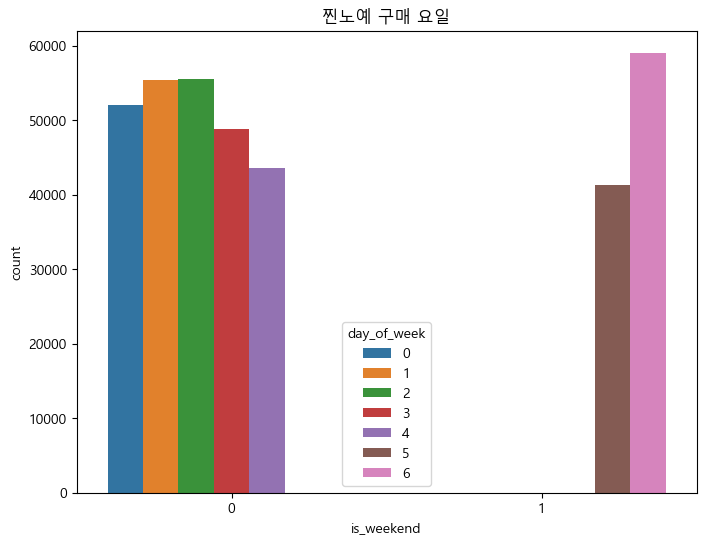

In [62]:
plt.figure(figsize=(8, 6))
plt.title("찐노예 구매 요일")
sns.countplot(data=purchase_df.loc[purchase_df.event_name=='purchase_success'], x='is_weekend', hue='day_of_week')
plt.show()

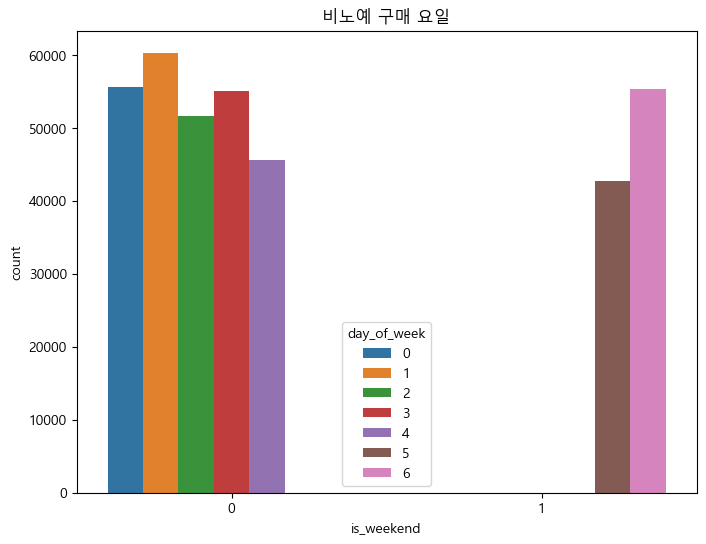

In [63]:
plt.figure(figsize=(8, 6))
plt.title("비노예 구매 요일")
sns.countplot(data=purchase_bdf.loc[purchase_bdf.event_name=='purchase_success'], x='is_weekend', hue='day_of_week')
plt.show()

In [64]:
temp_df = pd.read_csv('../../29CM_PJT_data/기온.csv')
temp_df

Unnamed: 0   지점   region event_datatime  평균기온(°C)
0              0  108    Seoul     2021-06-03      19.1
1              1  108    Seoul     2021-06-04      18.5
2              2  108    Seoul     2021-06-05      20.8
3              3  108    Seoul     2021-06-06      23.0
4              4  108    Seoul     2021-06-07      21.1
...          ...  ...      ...            ...       ...
1003        1003  112  Incheon     2021-07-31      28.2
1004        1004  112  Incheon     2021-08-01      26.7
1005        1005  112  Incheon     2021-08-02      25.7
1006        1006  112  Incheon     2021-08-03      27.6
1007        1007  112  Incheon     2021-08-04      28.1

[1008 rows x 5 columns]

In [65]:
temp_df = temp_df.drop(columns = 'Unnamed: 0')
temp_df

지점   region event_datatime  평균기온(°C)
0     108    Seoul     2021-06-03      19.1
1     108    Seoul     2021-06-04      18.5
2     108    Seoul     2021-06-05      20.8
3     108    Seoul     2021-06-06      23.0
4     108    Seoul     2021-06-07      21.1
...   ...      ...            ...       ...
1003  112  Incheon     2021-07-31      28.2
1004  112  Incheon     2021-08-01      26.7
1005  112  Incheon     2021-08-02      25.7
1006  112  Incheon     2021-08-03      27.6
1007  112  Incheon     2021-08-04      28.1

[1008 rows x 4 columns]

In [66]:
temp_df.region.unique()

array(['Seoul', 'Busan', 'Gyeongsangnam-do', 'Gyeongsangbuk-do',
       'Gyeonggi-do', 'Ulsan', 'Jeollanam-do', 'Jeollabuk-do', 'Jeju-do',
       'Chungcheongnam-do', 'Chungcheongbuk-do', 'Gwangju', 'Daejeon',
       'Gangwon-do', 'Incheon'], dtype=object)

In [67]:
temp_df['region'] = temp_df.region.map(mapper)
temp_df

지점 region event_datatime  평균기온(°C)
0     108  서울특별시     2021-06-03      19.1
1     108  서울특별시     2021-06-04      18.5
2     108  서울특별시     2021-06-05      20.8
3     108  서울특별시     2021-06-06      23.0
4     108  서울특별시     2021-06-07      21.1
...   ...    ...            ...       ...
1003  112  인천광역시     2021-07-31      28.2
1004  112  인천광역시     2021-08-01      26.7
1005  112  인천광역시     2021-08-02      25.7
1006  112  인천광역시     2021-08-03      27.6
1007  112  인천광역시     2021-08-04      28.1

[1008 rows x 4 columns]

In [68]:
temp_df['event_datatime'] = pd.to_datetime(temp_df['event_datatime'], format='%Y-%m-%d')

In [69]:
temp_df.rename(columns={'event_datatime' : 'event_timestamp'}, inplace = True)

In [70]:
temp_df

지점 region event_timestamp  평균기온(°C)
0     108  서울특별시      2021-06-03      19.1
1     108  서울특별시      2021-06-04      18.5
2     108  서울특별시      2021-06-05      20.8
3     108  서울특별시      2021-06-06      23.0
4     108  서울특별시      2021-06-07      21.1
...   ...    ...             ...       ...
1003  112  인천광역시      2021-07-31      28.2
1004  112  인천광역시      2021-08-01      26.7
1005  112  인천광역시      2021-08-02      25.7
1006  112  인천광역시      2021-08-03      27.6
1007  112  인천광역시      2021-08-04      28.1

[1008 rows x 4 columns]

In [71]:
purchase_df['event_timestamp2'] = purchase_df.event_timestamp.dt.date
purchase_df['event_timestamp2'] = pd.to_datetime(purchase_df.event_timestamp2, format='%Y-%m-%d')

In [72]:
purchase_bdf['event_timestamp2'] = purchase_bdf.event_timestamp.dt.date
purchase_bdf['event_timestamp2'] = pd.to_datetime(purchase_bdf.event_timestamp2, format='%Y-%m-%d')

In [73]:
purchase_df['region']=purchase_df.region.map(mapper)

In [74]:
purchase_df = pd.merge(purchase_df, temp_df, left_on=['region', 'event_timestamp2'], right_on=['region', 'event_timestamp'], how='left')

In [75]:
purchase_bdf = pd.merge(purchase_bdf, temp_df, left_on=['region', 'event_timestamp2'], right_on=['region', 'event_timestamp'], how='left')

In [76]:
purchase_df

user_no                   item_no  \
0       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
1       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
2       BbMDxDofKWmrkqGJGjZRjA==  S6VLcrg21I4QHy9OGrjDiw==   
3       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
4       BbMDxDofKWmrkqGJGjZRjA==  Bxl8EmzK2k7bseEAeBrgkA==   
...                          ...                       ...   
635363  a+VESOxVicnmoRFK/nDSNg==  e/FzK1ZQWsGBOmVouLDu/A==   
635364  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
635365  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
635366  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   
635367  a+VESOxVicnmoRFK/nDSNg==  hDsDlg9Y8XLRbeaOF5p3dQ==   

                event_timestamp_x        event_name device_type  \
0      2021-06-10 18:22:24.252014        click_item      mobile   
1      2021-06-10 18:23:16.388027        click_item      mobile   
2      2021-06-10 22:40:50.623004  purchase_success      mobile   
3      2021-06-21 00:24:22.606037        click_item      mobile   
4      2021-06-21 10:18:54.181004  purchase_success      mobile   
...                           ...               ...         ...   
635363 2021-07-14 13:22:48.046026        click_item      mobile   
635364 2021-07-07 18:25:20.619006        click_item      mobile   
635365 2021-07-07 18:25:37.240019        click_item      mobile   
635366 2021-07-07 19:25:02.235006  purchase_success      mobile   
635367 2021-07-14 13:06:46.729069        click_item      mobile   

       mobile_brand_name      country region                    item_name  \
0                  Apple  South Korea  서울특별시       half box shirt - white   
1                  Apple  South Korea  서울특별시       half box shirt - white   
2                  Apple  South Korea  서울특별시       half box shirt - white   
3                  Apple  South Korea  서울특별시  Vert Sleeveless Knit (navy)   
4                  Apple  South Korea  서울특별시  Vert Sleeveless Knit (navy)   
...                  ...          ...    ...                          ...   
635363             Apple  South Korea    경기도                 1 MILE PANTS   
635364             Apple  South Korea    강원도      1 MILE HALF PANTS(blue)   
635365             Apple  South Korea    강원도      1 MILE HALF PANTS(blue)   
635366             Apple  South Korea    강원도      1 MILE HALF PANTS(blue)   
635367             Apple  South Korea    경기도      1 MILE HALF PANTS(blue)   

                              image_name  ...  gender age event_duration  \
0       a7ec4395819330a593080f316a2313f6  ...       F  29              0   
1       a7ec4395819330a593080f316a2313f6  ...       F  29              0   
2       a7ec4395819330a593080f316a2313f6  ...       F  29            258   
3       b2edd3ea7a27979802c876899e4b0e55  ...       F  29              0   
4       b2edd3ea7a27979802c876899e4b0e55  ...       F  29            594   
...                                  ...  ...     ...  ..            ...   
635363  da9c04f30c0b96e0bc8b0c0c71521551  ...       F  41              0   
635364  079380df64e08d71cfc18186c7184a69  ...       F  41              0   
635365  079380df64e08d71cfc18186c7184a69  ...       F  41              0   
635366  079380df64e08d71cfc18186c7184a69  ...       F  41             59   
635367  079380df64e08d71cfc18186c7184a69  ...       F  41              0   

       event_count is_weekend day_of_week event_timestamp2     지점  \
0                0          0           3       2021-06-10  108.0   
1                0          0           3       2021-06-10  108.0   
2                3          0           3       2021-06-10  108.0   
3                0          0           0       2021-06-21  108.0   
4                2          0           0       2021-06-21  108.0   
...            ...        ...         ...              ...    ...   
635363           0          0           2       2021-07-14  202.0   
635364           0          0           2       2021-07-07  105.0   
635365          

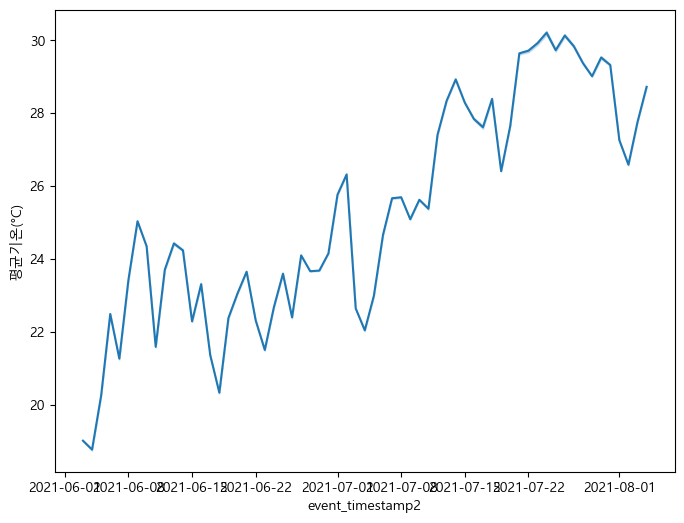

In [77]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=purchase_df.loc[purchase_df.event_name=='purchase_success'], x='event_timestamp2', y='평균기온(°C)')
plt.show()

In [78]:
len(mapper.values())

16

C:\Users\94dng\AppData\Local\Temp\ipykernel_6036\373284975.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



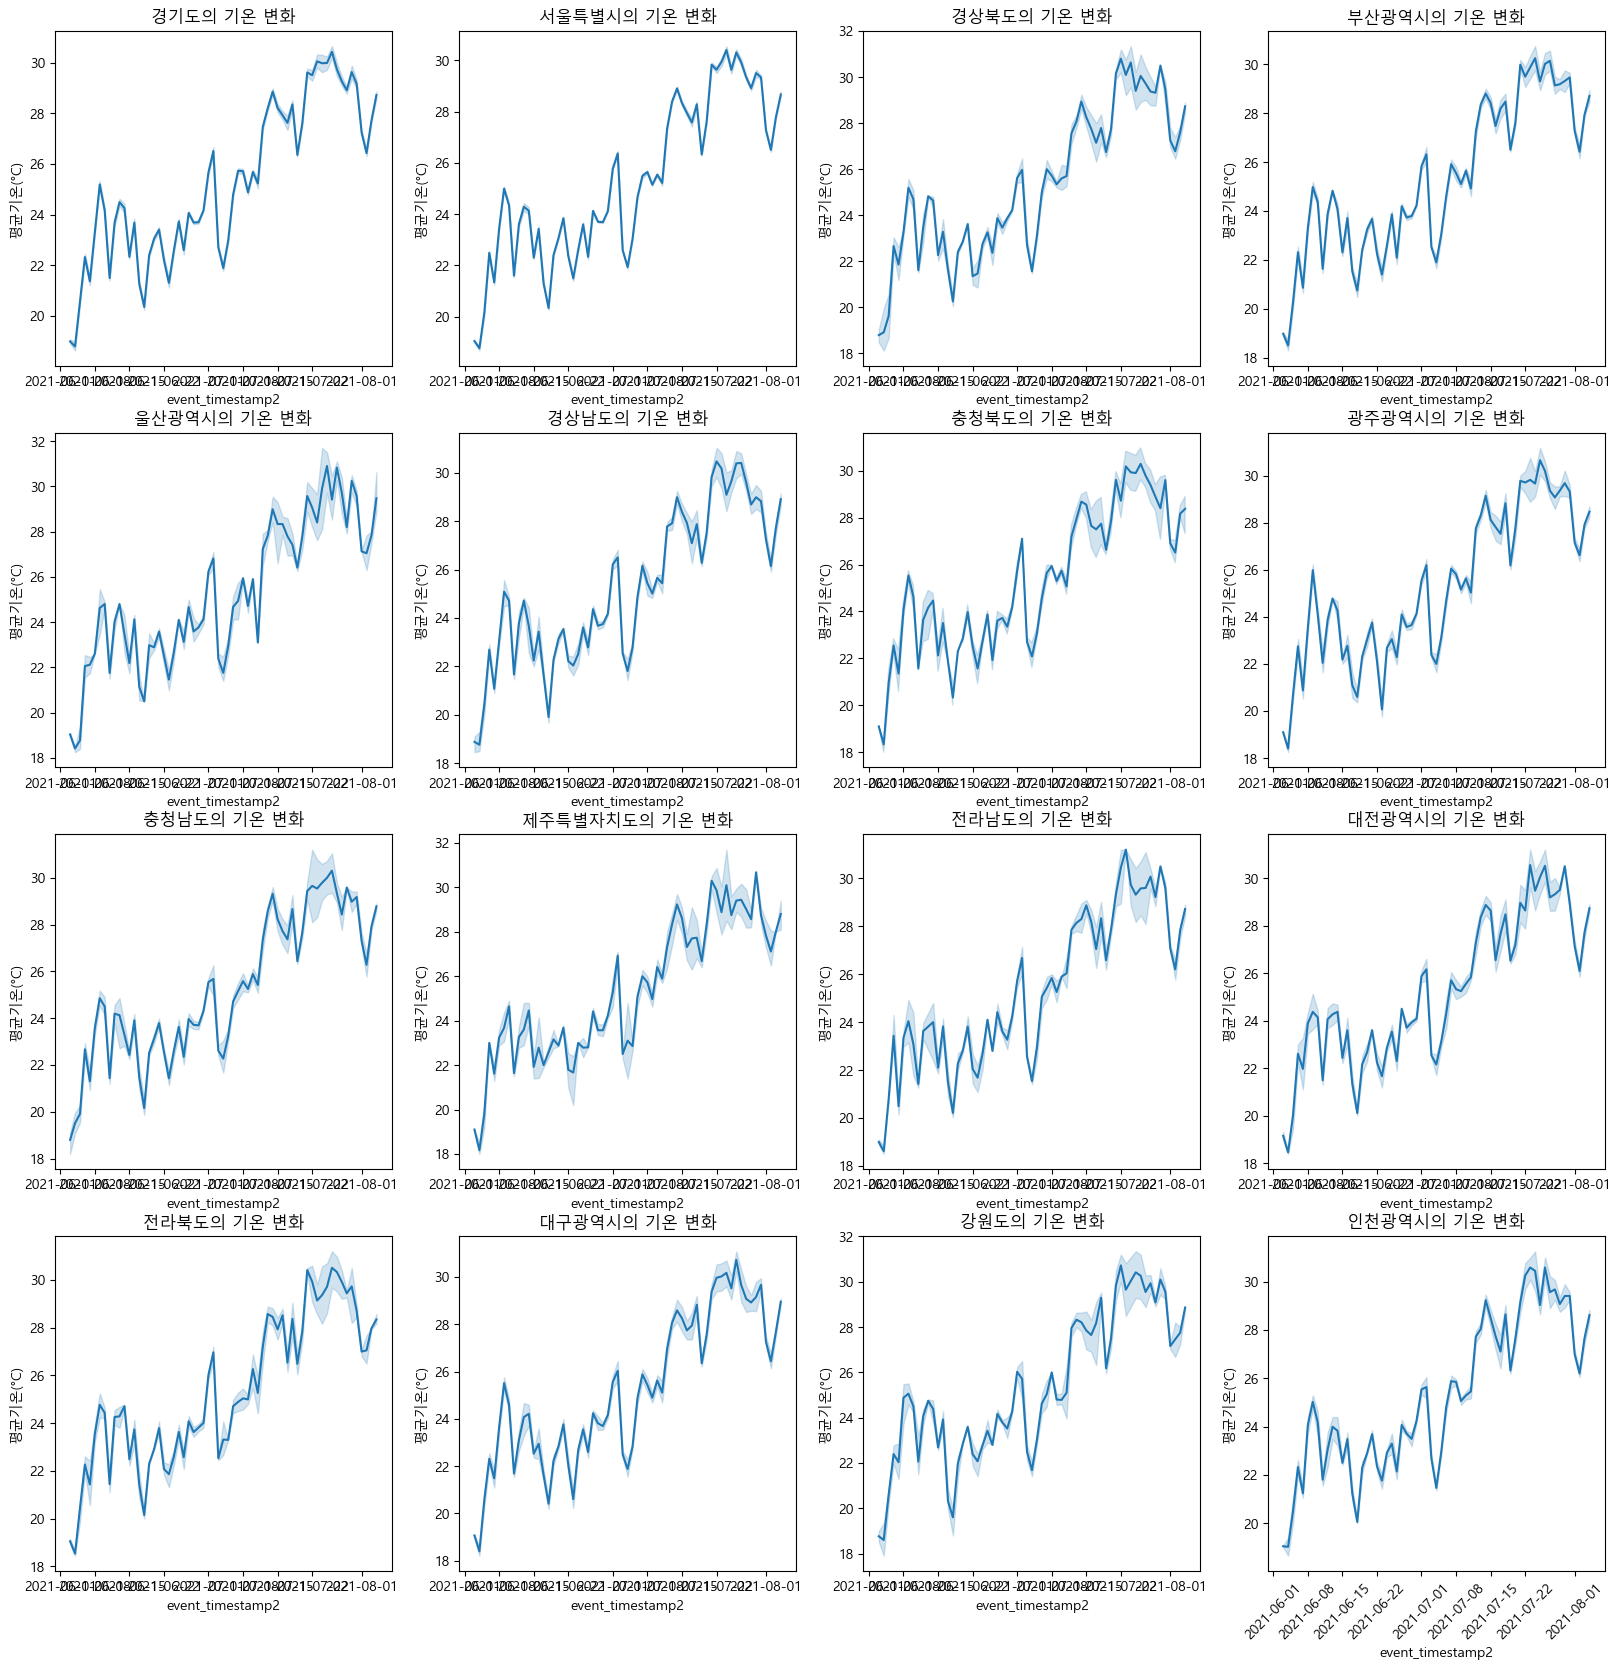

In [79]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for idx, name in enumerate(mapper.values()):
    
    sns.lineplot(data=purchase_df.loc[((purchase_df['event_name']=='purchase_success')&(purchase_bdf['category3_name']=='티셔츠')&(purchase_bdf['region']==name))], 
                x='event_timestamp2', y='평균기온(°C)', ax=ax[idx//4, idx%4])
    ax[idx//4, idx%4].set_title(f'{name}의 기온 변화')
    plt.xticks(rotation = 45)
    
f.show()

C:\Users\94dng\AppData\Local\Temp\ipykernel_6036\1214393480.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



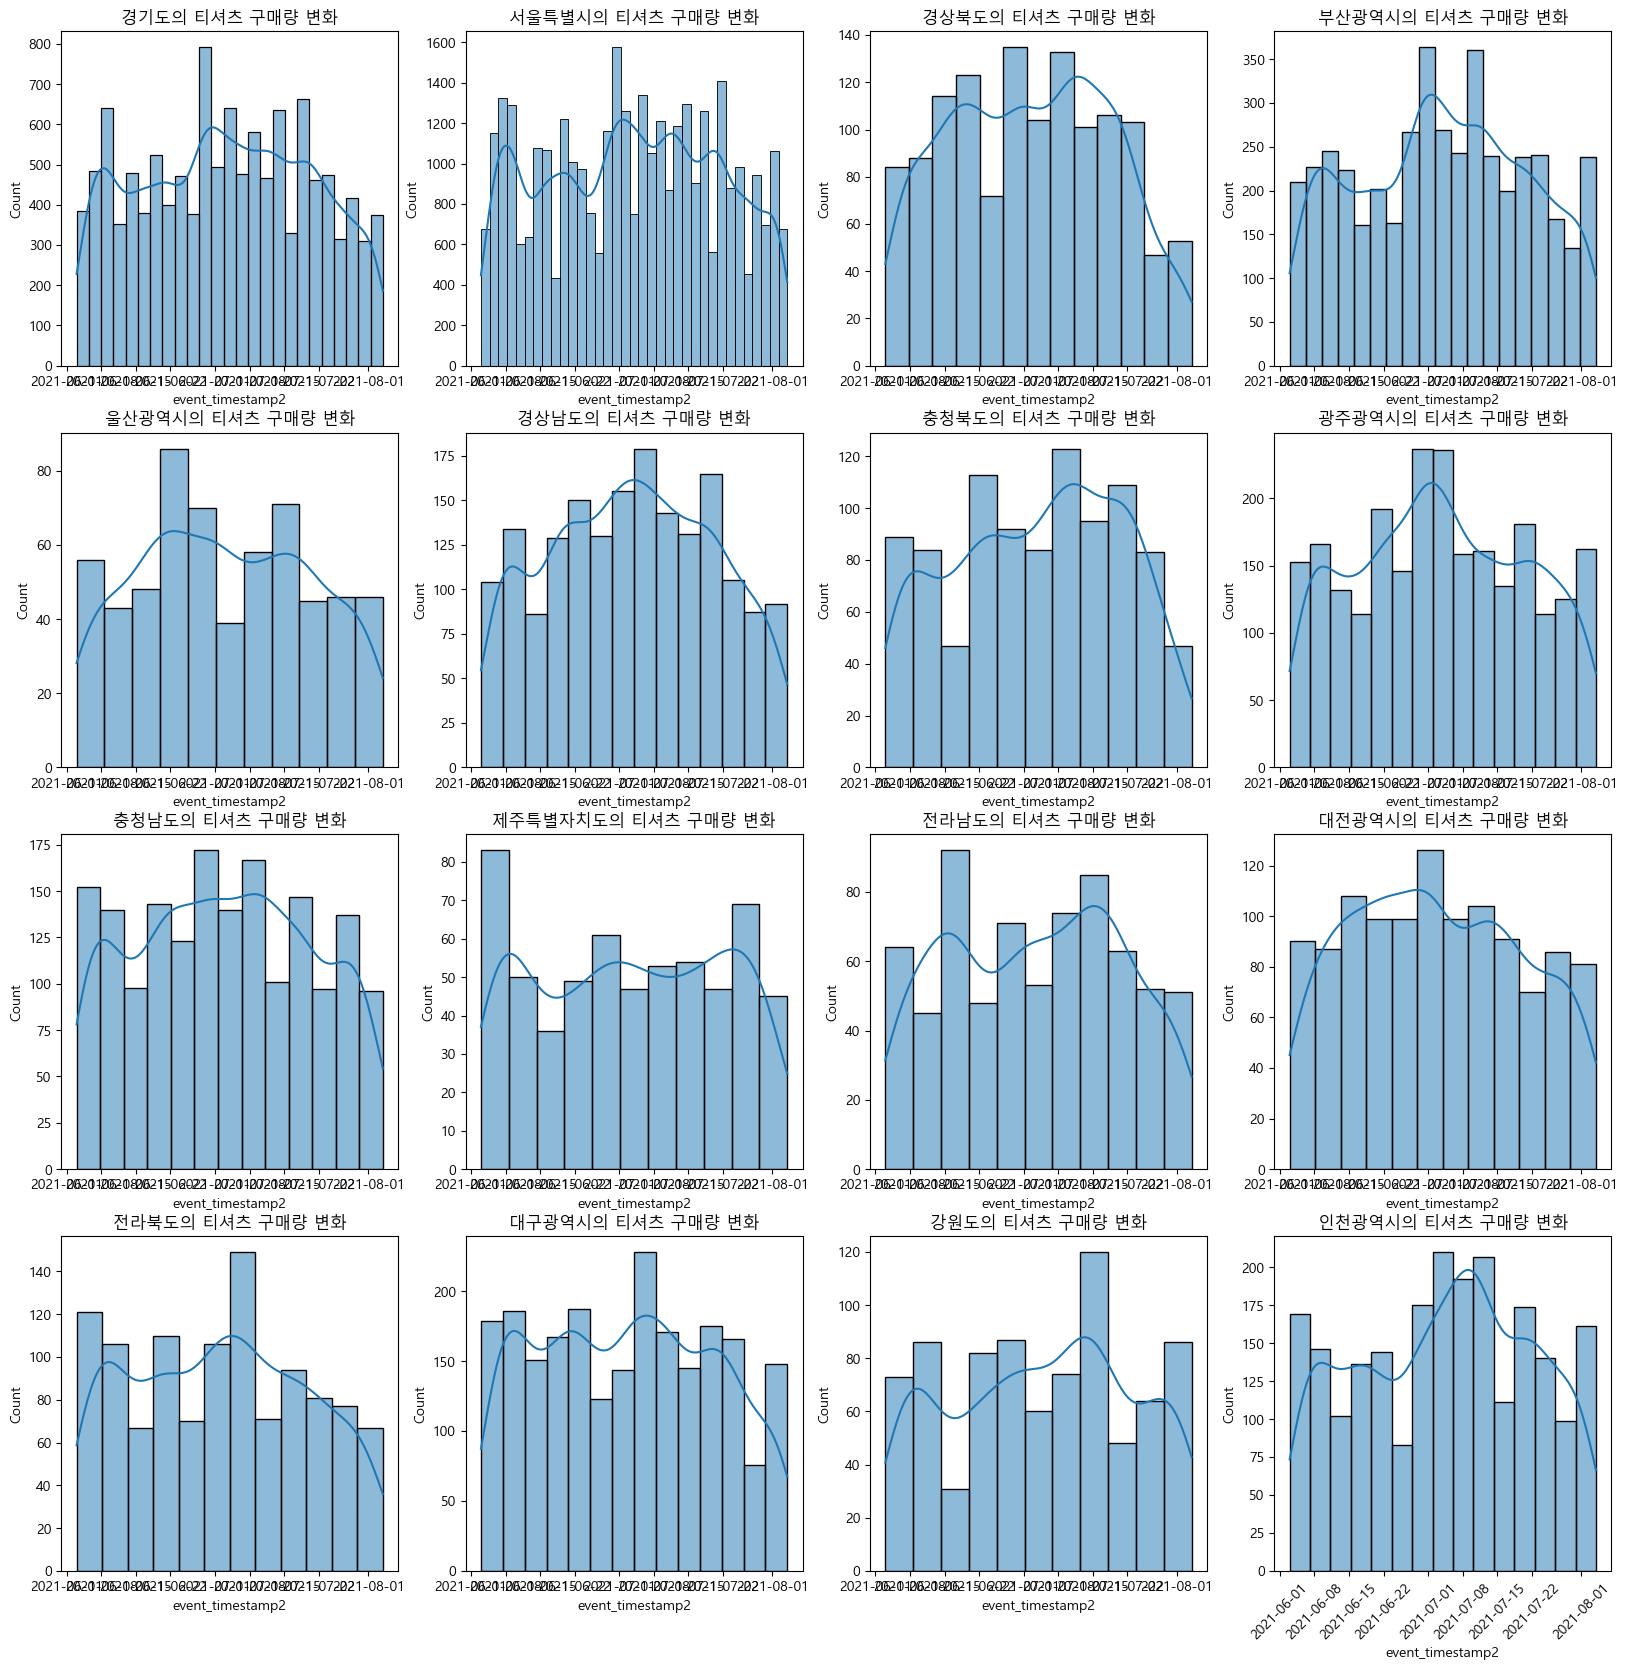

In [80]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for idx, name in enumerate(mapper.values()):
    ax[idx//4, idx%4].set_title(f'{name}의 티셔츠 구매량 변화')
    plt.xticks(rotation = 45)
    sns.histplot(data=purchase_df.loc[((purchase_df['event_name']=='purchase_success')&(purchase_bdf['category3_name']=='티셔츠')&(purchase_bdf['region']==name))], 
                x='event_timestamp2', ax=ax[idx//4, idx%4], kde = True)
    
    
f.show()

(array([18779., 18786., 18793., 18800., 18809., 18816., 18823., 18830.,
        18840.]),
 [Text(18779.0, 0, '2021-06-01'),
  Text(18786.0, 0, '2021-06-08'),
  Text(18793.0, 0, '2021-06-15'),
  Text(18800.0, 0, '2021-06-22'),
  Text(18809.0, 0, '2021-07-01'),
  Text(18816.0, 0, '2021-07-08'),
  Text(18823.0, 0, '2021-07-15'),
  Text(18830.0, 0, '2021-07-22'),
  Text(18840.0, 0, '2021-08-01')])

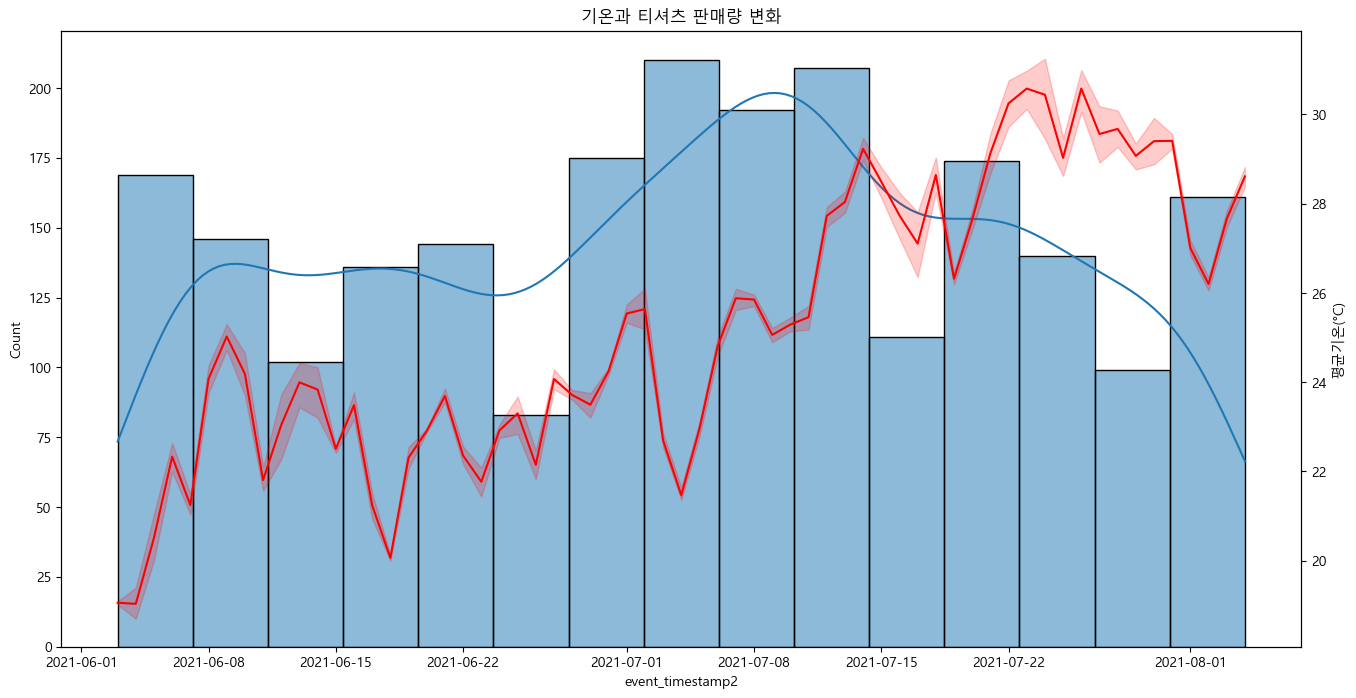

In [81]:

fig, axe1 = plt.subplots()
axe1.set_title('기온과 티셔츠 판매량 변화')
fig.set_figheight(8)
fig.set_figwidth(16)
axe2 = axe1.twinx()
chart1 = sns.histplot(data=purchase_df.loc[((purchase_df['event_name']=='purchase_success')&(purchase_bdf['category3_name']=='티셔츠')&(purchase_bdf['region']==name))], 
                x='event_timestamp2', kde=True, ax=axe1)
chart2 = sns.lineplot(data=purchase_df.loc[((purchase_df['event_name']=='purchase_success')&(purchase_bdf['category3_name']=='티셔츠')&(purchase_bdf['region']==name))], 
                x='event_timestamp2', y='평균기온(°C)', ax=axe2, color='red')


# axe1.legend(['count', 'b'])

# axe1.set_ylabel('count')
# axe2.set_ylabel('b')
plt.xticks(rotation = 45)

In [82]:
LENINA_df = purchase_df.loc[((purchase_df.brand_name=='LENINA')&(purchase_df.event_name=='purchase_success'))]
LENINA_bdf = purchase_bdf.loc[((purchase_bdf.brand_name=='LENINA')&(purchase_bdf.event_name=='purchase_success'))]

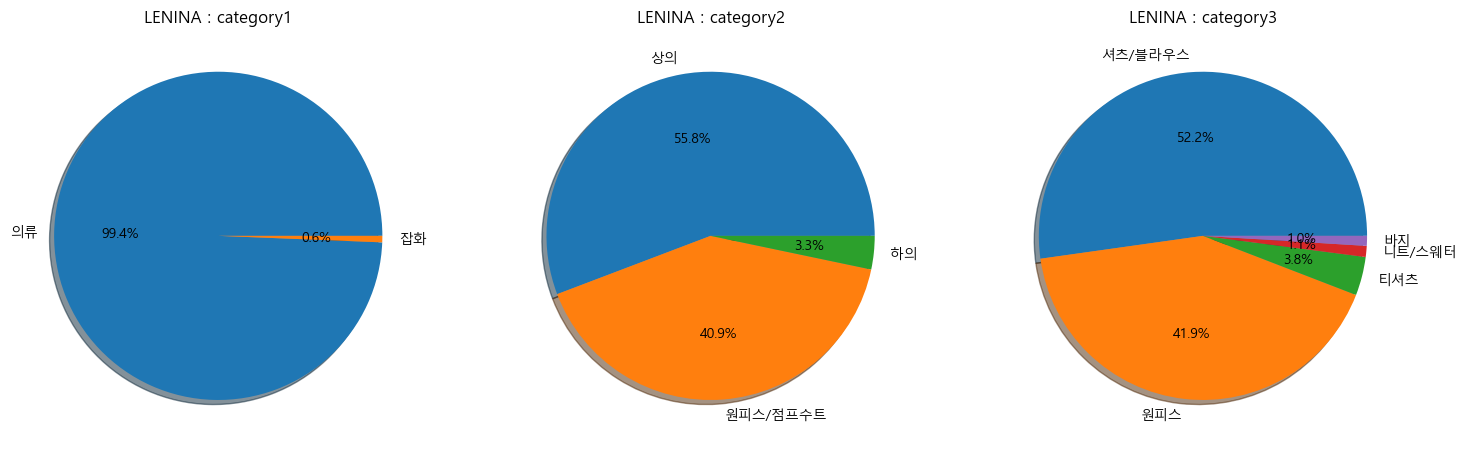

In [83]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))

for i in range(1, 4):
    LENINA_bdf.loc[LENINA_bdf[f'category{i}_name'].isin(df[f'category{i}_name'].value_counts()[:5].index), f'category{i}_name'].value_counts().plot.pie(autopct='%1.1f%%', ax = ax[i-1], shadow=True);
    ax[i-1].set_title(f'LENINA : category{i}')
    ax[i-1].set_ylabel('')
plt.show()

In [84]:
purchase_df.columns

Index(['user_no', 'item_no', 'event_timestamp_x', 'event_name', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_name', 'category2_name', 'category3_name',
       'brand_name', 'birth_date', 'gender', 'age', 'event_duration',
       'event_count', 'is_weekend', 'day_of_week', 'event_timestamp2', '지점',
       'event_timestamp_y', '평균기온(°C)'],
      dtype='object')

In [85]:
d1 = purchase_df.loc[((purchase_df.event_name=='purchase_success')&(purchase_df.category3_name=='티셔츠'))]['평균기온(°C)'].value_counts()
d2 = purchase_bdf.loc[((purchase_bdf.event_name=='purchase_success')&(purchase_bdf.category3_name=='티셔츠'))]['평균기온(°C)'].value_counts()

In [86]:
d1 = d1.reset_index()
d2 = d2.reset_index()


In [87]:
d1

index  평균기온(°C)
0     23.0      2283
1     24.3      1919
2     23.9      1807
3     28.1      1790
4     23.6      1778
..     ...       ...
126   17.6         9
127   30.7         7
128   19.3         7
129   31.3         6
130   19.5         4

[131 rows x 2 columns]

<AxesSubplot: xlabel='index', ylabel='Count'>

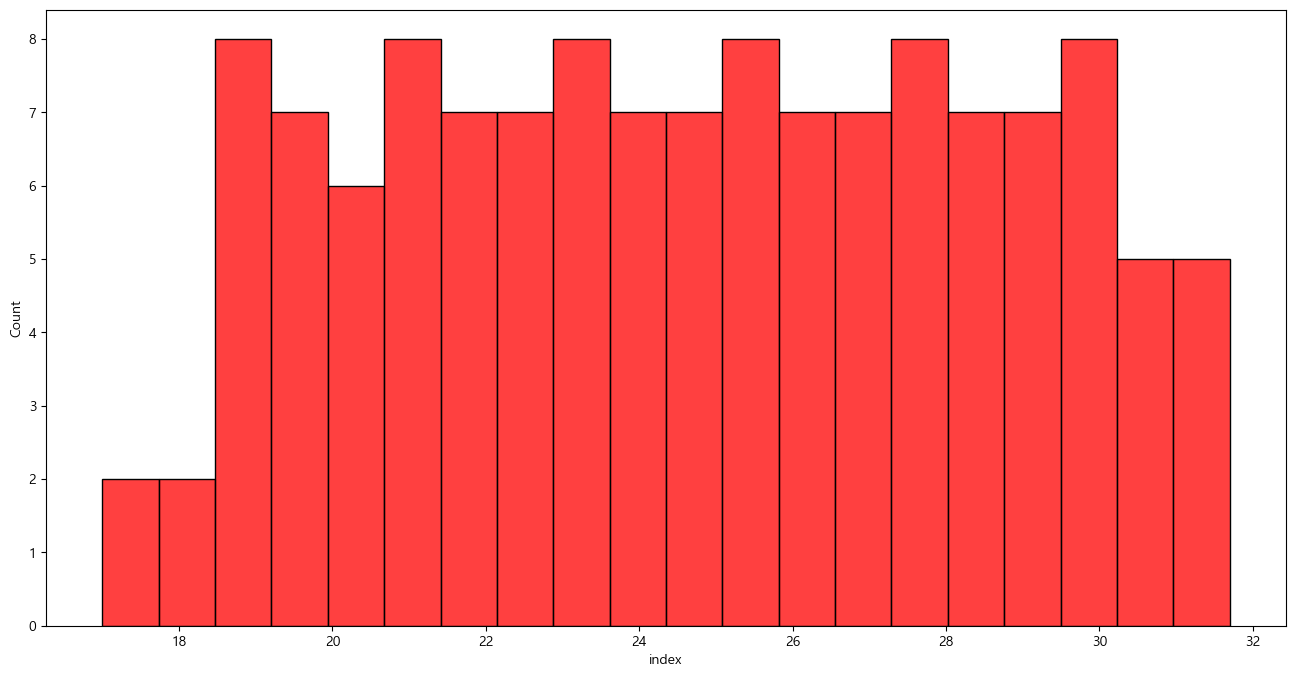

In [88]:
plt.figure(figsize=(16,8))
sns.histplot(data=d1, x='index',  color = 'red', bins = 20)
#sns.lineplot(data=d2, x='index', y='평균기온(°C)', color = 'blue')

In [93]:
purchase_df = purchase_df[['user_no', 'item_no', 'event_timestamp_x', 'event_name', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_name', 'category2_name', 'category3_name',
       'brand_name', 'birth_date', 'gender', 'age', 'event_duration',
       'event_count', 'is_weekend', 'day_of_week',
       '평균기온(°C)']]

In [94]:
purchase_bdf = purchase_bdf[['user_no', 'item_no', 'event_timestamp_x', 'event_name', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_name', 'category2_name', 'category3_name',
       'brand_name', 'birth_date', 'gender', 'age', 'event_duration',
       'event_count', 'is_weekend', 'day_of_week',
       '평균기온(°C)']]

In [100]:
purchase_df.rename({'event_timestamp_x' : 'event_timestamp'}, inplace = True)
purchase_bdf.rename({'event_timestamp_x' : 'event_timestamp'}, inplace = True)

In [107]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635368 entries, 0 to 635367
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_no            635368 non-null  object        
 1   item_no            635368 non-null  object        
 2   event_timestamp_x  635368 non-null  datetime64[ns]
 3   event_name         635368 non-null  object        
 4   device_type        635368 non-null  object        
 5   mobile_brand_name  634554 non-null  object        
 6   country            635364 non-null  object        
 7   region             631791 non-null  object        
 8   item_name          635368 non-null  object        
 9   image_name         635368 non-null  object        
 10  price              635368 non-null  float64       
 11  category1_name     635368 non-null  object        
 12  category2_name     635368 non-null  object        
 13  category3_name     635368 non-null  object  

|항목|설명|항목|설명|
|---|---|---|---|
|user_no (object)|유저 고유 번호|item_no (object)|물품 고유 번호|         
|event_timestamp (datetime64[ns])|이벤트 발생 시점|event_name (object)|클릭, 좋아요, 카트 담기, 구매|        
|country (object)|국가|region (object)|지역|        
|item_name (object)|품목 이름|price float64|가격(₩)|       
|category1_name (object)|가장 큰 범주의 카테고리|category2_name (object)|카테고리 1의 세부 카테고리|        
|category3_name (object)|카테고리 2의 세부 카테고리|brand_name (object)|품목의 브랜드 이름|        
|birth_date (datetime64[ns])|유저의 생년월일|gender (object)|성별|        
|age (int64)|유저의 나이|event_duration (object)|특정 유저가 품목을 구매하기까지 걸린 시간|        
|event_count (int64)|특정 유저가 품목을 구매하기까지 발생한 이벤트 수|||  

In [114]:
purchase_df.describe()

price            age    event_count     is_weekend  \
count  6.353680e+05  635368.000000  635368.000000  635368.000000   
mean   6.408772e+04      35.931725       8.110248       0.285156   
std    6.311562e+04       8.168195      66.597039       0.451489   
min    0.000000e+00      12.000000       0.000000       0.000000   
25%    2.700000e+04      30.000000       0.000000       0.000000   
50%    4.690000e+04      34.000000       1.000000       0.000000   
75%    8.500000e+04      41.000000       3.000000       1.000000   
max    5.220000e+06      95.000000    1892.000000       1.000000   

         day_of_week       평균기온(°C)  
count  635368.000000  605055.000000  
mean        2.958537      25.153082  
std         2.037082       3.081369  
min         0.000000      17.000000  
25%         1.000000      22.900000  
50%         3.000000      24.800000  
75%         5.000000      27.500000  
max         6.000000      31.700000

In [117]:
event_df

session_id             event_timestamp  \
0        c47e93742387750baba2e238558fa12d     2021-06-03 13:00:01.845   
1        f482aba7e1b76564c5404d96650f0dbd  2021-06-03 13:00:01.920001   
2        9af56dc40a6586dd211ca30f0a3e74d1      2021-06-03 13:00:02.35   
3        51e148afe55e6f296c0931cac6bc2c1d     2021-06-03 13:00:02.994   
4        3316370366bdbd2fdff02e996c1b2721  2021-06-03 13:00:03.312001   
...                                   ...                         ...   
5880402  dd2a71d30af7c856b61223bd45b54dbe  2021-08-04 12:59:53.129054   
5880403  1006525137f948b588322af3ffe4f7ec     2021-08-04 12:59:56.151   
5880404  5ca46d4d8ffc29bad42d8b6fc830e364  2021-08-04 12:59:56.952028   
5880405  184c25447f47b4c831a9771801381577  2021-08-04 12:59:58.019142   
5880406  fdacda7a5859f3b7f4e0d80d0b95d544  2021-08-04 12:59:59.284045   

          event_name                   user_no                   item_no  \
0         click_item  +9eODQMZ8YgXQZJJAo56nw==  4KwsZkXDulM0oQ2sTVSlYQ==   
1        add_to_cart  qik2Oa/1SQAjHeR64GLY0g==  +3vED/NUxtVk4Dvc0QUahA==   
2         click_item  FJJ6W70VNARaqflivNavLg==  xuuGT7/l+fld/geUzu6BkA==   
3         click_item  MsFi+mS5EhwSv+ZqTtZ53w==  FC0aiDVh1JjIXUschc44Pg==   
4        add_to_cart  frWHEf/czsCEjklEIwxxKA==  yXpbzgtgRe37PEbJlBiKmQ==   
...              ...                       ...                       ...   
5880402   click_item  ROKDMwVDKbb9N82CptJ9dg==  xKvqk3vRvFLpCTQTqpL4ew==   
5880403   click_item  0nfvwBd9Qriig0lIgvtiBA==  1qWgJ5SJvbi5+mBYGH848A==   
5880404   click_item  Z0a8cvN+t0V2WInGzjkM5Q==  M9ucsQ4dNX/t1Bopo599BA==   
5880405   click_item  vQeO3FiA+W7bmyu2tdKuGg==  W/LoA3I9ym6wowhAdCsUvA==   
5880406   click_item  GMv4Y+rk7KkfcR5qlFVrBQ==  1SsPsB/HdsUHnyNqKcEvuw==   

        device_type mobile_brand_name mobile_model_name mobile_marketing_name  \
0            mobile           Samsung          SM-N960N          Galaxy Note9   
1            mobile           Samsung          SM-G977N         Galaxy S10 5G   
2            mobile             Apple            iPhone                   NaN   
3            mobile             Apple            iPhone                   NaN   
4            mobile           Samsung          SM-G970N           Galaxy S10e   
...             ...               ...               ...                   ...   
5880402      mobile             Apple            iPhone                   NaN   
5880403      mobile             Apple            iPhone                   NaN   
5880404      mobile             Apple            iPhone                   NaN   
5880405      mobile           Samsung          SM-G977N         Galaxy S10 5G   
5880406      mobile             Apple            iPhone                   NaN   

        operating_system_version      country            region platform  
0                     Android 10  South Korea       Gyeonggi-do  ANDROID  
1                     Android 11  South Korea             Seoul  ANDROID  
2                     iOS 14.4.2  South Korea             Seoul      IOS  
3                     iOS 14.4.2  South Korea  Gyeongsangbuk-do      IOS  
4                     Android 11  South Korea             Seoul  ANDROID  
...                          ...          ...               ...      ...  
5880402                 iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
5880403                 iOS 14.6  South Korea  Gyeongsangnam-do      IOS  
5880404                 iOS 14.6  South Korea       Gyeonggi-do      IOS  
5880405               Android 11  South Korea             Busan  ANDROID  
5880406                 iOS 14.6  South Korea       Gyeonggi-do      IOS  

[5880407 rows x 13 columns]